In [2]:
import os
import time
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
from model import *
from data import *
from utils import *
from loss_function import *
from matplotlib import pyplot as plt

In [3]:
# Pretrain on MNIST dataset 
torch.manual_seed(0)

print("==> start pretraining")
print("==> model will be saved in pretrained folder and diretly used for the initialization of an attack")

device = 'cuda:0'
dataset_0 = 'mnist'
dataset_1 = 'mnist1'
batch_size = 1000
train_size = 60000
test_size=10000
n_epochs=100

==> start pretraining
==> model will be saved in pretrained folder and diretly used for the initialization of an attack


In [4]:
leader = Leader().to(device).double()

In [5]:
# Train dataloader
dataset_train = get_data(dataset_0,train_size)
batch_size = 1000
train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

criterion = nn.MSELoss()
optimizer = optim.Adam(leader.parameters(), lr=1e-3)

In [6]:
def train(epoch):
    total_loss=0
    total_num=0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        n_inputs = torch.cat((labels.reshape((len(labels), 1)).double(), inputs.double()), dim=1)
        n_inputs = n_inputs.to(device)
        inputs = inputs.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = leader(n_inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        # print statistics
        torch.save(leader.state_dict(), './pretrained/leader.pt')
        total_loss += loss.item()
        print('Train Epoch: [{}/{}], Loss: {:.4f}'.format(epoch, n_epochs, loss))
    first_image = np.array(outputs[0].cpu().detach().numpy(), dtype='float')
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

Train Epoch: [0/100], Loss: 0.9329
Train Epoch: [0/100], Loss: 0.6906
Train Epoch: [0/100], Loss: 0.3880
Train Epoch: [0/100], Loss: 0.3083
Train Epoch: [0/100], Loss: 0.3052
Train Epoch: [0/100], Loss: 0.3092
Train Epoch: [0/100], Loss: 0.3033
Train Epoch: [0/100], Loss: 0.2964
Train Epoch: [0/100], Loss: 0.2986
Train Epoch: [0/100], Loss: 0.2933
Train Epoch: [0/100], Loss: 0.2812
Train Epoch: [0/100], Loss: 0.2732
Train Epoch: [0/100], Loss: 0.2709
Train Epoch: [0/100], Loss: 0.2617
Train Epoch: [0/100], Loss: 0.2530
Train Epoch: [0/100], Loss: 0.2442
Train Epoch: [0/100], Loss: 0.2396
Train Epoch: [0/100], Loss: 0.2370
Train Epoch: [0/100], Loss: 0.2312
Train Epoch: [0/100], Loss: 0.2222
Train Epoch: [0/100], Loss: 0.2116
Train Epoch: [0/100], Loss: 0.2055
Train Epoch: [0/100], Loss: 0.2030
Train Epoch: [0/100], Loss: 0.1958
Train Epoch: [0/100], Loss: 0.1944
Train Epoch: [0/100], Loss: 0.1890
Train Epoch: [0/100], Loss: 0.1845
Train Epoch: [0/100], Loss: 0.1791
Train Epoch: [0/100]

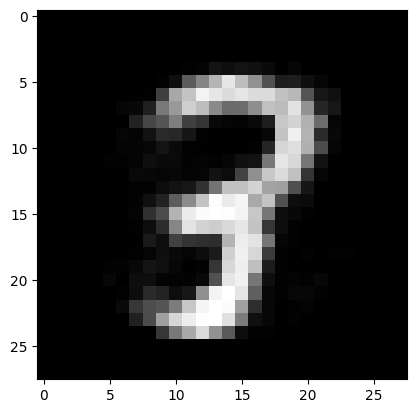

Train Epoch: [1/100], Loss: 0.0829
Train Epoch: [1/100], Loss: 0.0840
Train Epoch: [1/100], Loss: 0.0848
Train Epoch: [1/100], Loss: 0.0787
Train Epoch: [1/100], Loss: 0.0750
Train Epoch: [1/100], Loss: 0.0761
Train Epoch: [1/100], Loss: 0.0764
Train Epoch: [1/100], Loss: 0.0741
Train Epoch: [1/100], Loss: 0.0730
Train Epoch: [1/100], Loss: 0.0729
Train Epoch: [1/100], Loss: 0.0724
Train Epoch: [1/100], Loss: 0.0702
Train Epoch: [1/100], Loss: 0.0699
Train Epoch: [1/100], Loss: 0.0712
Train Epoch: [1/100], Loss: 0.0684
Train Epoch: [1/100], Loss: 0.0659
Train Epoch: [1/100], Loss: 0.0650
Train Epoch: [1/100], Loss: 0.0630
Train Epoch: [1/100], Loss: 0.0649
Train Epoch: [1/100], Loss: 0.0650
Train Epoch: [1/100], Loss: 0.0610
Train Epoch: [1/100], Loss: 0.0638
Train Epoch: [1/100], Loss: 0.0652
Train Epoch: [1/100], Loss: 0.0597
Train Epoch: [1/100], Loss: 0.0647
Train Epoch: [1/100], Loss: 0.0639
Train Epoch: [1/100], Loss: 0.0623
Train Epoch: [1/100], Loss: 0.0631
Train Epoch: [1/100]

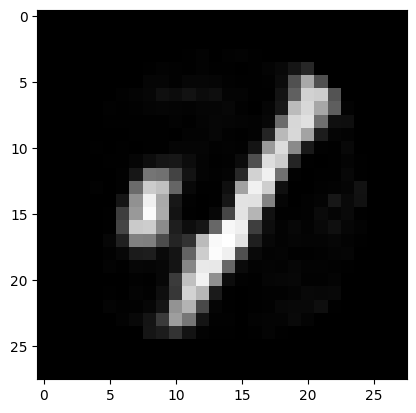

Train Epoch: [2/100], Loss: 0.0404
Train Epoch: [2/100], Loss: 0.0398
Train Epoch: [2/100], Loss: 0.0407
Train Epoch: [2/100], Loss: 0.0392
Train Epoch: [2/100], Loss: 0.0398
Train Epoch: [2/100], Loss: 0.0392
Train Epoch: [2/100], Loss: 0.0404
Train Epoch: [2/100], Loss: 0.0397
Train Epoch: [2/100], Loss: 0.0386
Train Epoch: [2/100], Loss: 0.0389
Train Epoch: [2/100], Loss: 0.0374
Train Epoch: [2/100], Loss: 0.0374
Train Epoch: [2/100], Loss: 0.0379
Train Epoch: [2/100], Loss: 0.0373
Train Epoch: [2/100], Loss: 0.0368
Train Epoch: [2/100], Loss: 0.0371
Train Epoch: [2/100], Loss: 0.0361
Train Epoch: [2/100], Loss: 0.0364
Train Epoch: [2/100], Loss: 0.0369
Train Epoch: [2/100], Loss: 0.0348
Train Epoch: [2/100], Loss: 0.0356
Train Epoch: [2/100], Loss: 0.0349
Train Epoch: [2/100], Loss: 0.0345
Train Epoch: [2/100], Loss: 0.0333
Train Epoch: [2/100], Loss: 0.0334
Train Epoch: [2/100], Loss: 0.0340
Train Epoch: [2/100], Loss: 0.0341
Train Epoch: [2/100], Loss: 0.0331
Train Epoch: [2/100]

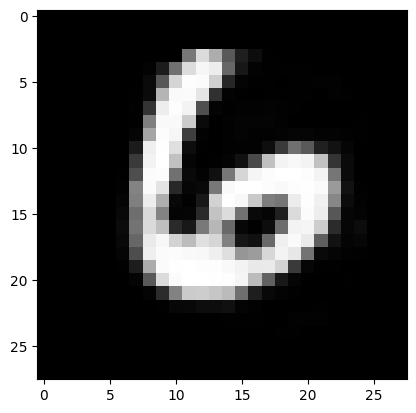

Train Epoch: [3/100], Loss: 0.0276
Train Epoch: [3/100], Loss: 0.0281
Train Epoch: [3/100], Loss: 0.0272
Train Epoch: [3/100], Loss: 0.0273
Train Epoch: [3/100], Loss: 0.0270
Train Epoch: [3/100], Loss: 0.0272
Train Epoch: [3/100], Loss: 0.0272
Train Epoch: [3/100], Loss: 0.0268
Train Epoch: [3/100], Loss: 0.0278
Train Epoch: [3/100], Loss: 0.0263
Train Epoch: [3/100], Loss: 0.0262
Train Epoch: [3/100], Loss: 0.0262
Train Epoch: [3/100], Loss: 0.0261
Train Epoch: [3/100], Loss: 0.0265
Train Epoch: [3/100], Loss: 0.0272
Train Epoch: [3/100], Loss: 0.0263
Train Epoch: [3/100], Loss: 0.0257
Train Epoch: [3/100], Loss: 0.0258
Train Epoch: [3/100], Loss: 0.0260
Train Epoch: [3/100], Loss: 0.0254
Train Epoch: [3/100], Loss: 0.0257
Train Epoch: [3/100], Loss: 0.0250
Train Epoch: [3/100], Loss: 0.0249
Train Epoch: [3/100], Loss: 0.0254
Train Epoch: [3/100], Loss: 0.0254
Train Epoch: [3/100], Loss: 0.0258
Train Epoch: [3/100], Loss: 0.0247
Train Epoch: [3/100], Loss: 0.0254
Train Epoch: [3/100]

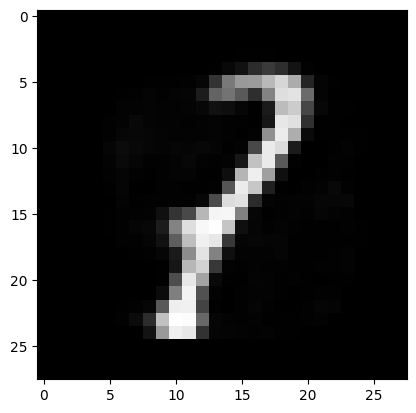

Train Epoch: [4/100], Loss: 0.0218
Train Epoch: [4/100], Loss: 0.0227
Train Epoch: [4/100], Loss: 0.0211
Train Epoch: [4/100], Loss: 0.0211
Train Epoch: [4/100], Loss: 0.0217
Train Epoch: [4/100], Loss: 0.0212
Train Epoch: [4/100], Loss: 0.0215
Train Epoch: [4/100], Loss: 0.0214
Train Epoch: [4/100], Loss: 0.0211
Train Epoch: [4/100], Loss: 0.0218
Train Epoch: [4/100], Loss: 0.0216
Train Epoch: [4/100], Loss: 0.0215
Train Epoch: [4/100], Loss: 0.0214
Train Epoch: [4/100], Loss: 0.0211
Train Epoch: [4/100], Loss: 0.0218
Train Epoch: [4/100], Loss: 0.0206
Train Epoch: [4/100], Loss: 0.0205
Train Epoch: [4/100], Loss: 0.0205
Train Epoch: [4/100], Loss: 0.0205
Train Epoch: [4/100], Loss: 0.0193
Train Epoch: [4/100], Loss: 0.0199
Train Epoch: [4/100], Loss: 0.0201
Train Epoch: [4/100], Loss: 0.0204
Train Epoch: [4/100], Loss: 0.0200
Train Epoch: [4/100], Loss: 0.0194
Train Epoch: [4/100], Loss: 0.0197
Train Epoch: [4/100], Loss: 0.0198
Train Epoch: [4/100], Loss: 0.0194
Train Epoch: [4/100]

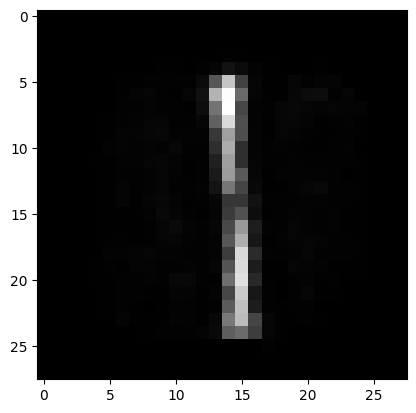

Train Epoch: [5/100], Loss: 0.0179
Train Epoch: [5/100], Loss: 0.0185
Train Epoch: [5/100], Loss: 0.0180
Train Epoch: [5/100], Loss: 0.0183
Train Epoch: [5/100], Loss: 0.0177
Train Epoch: [5/100], Loss: 0.0182
Train Epoch: [5/100], Loss: 0.0174
Train Epoch: [5/100], Loss: 0.0178
Train Epoch: [5/100], Loss: 0.0180
Train Epoch: [5/100], Loss: 0.0183
Train Epoch: [5/100], Loss: 0.0181
Train Epoch: [5/100], Loss: 0.0183
Train Epoch: [5/100], Loss: 0.0177
Train Epoch: [5/100], Loss: 0.0184
Train Epoch: [5/100], Loss: 0.0174
Train Epoch: [5/100], Loss: 0.0176
Train Epoch: [5/100], Loss: 0.0174
Train Epoch: [5/100], Loss: 0.0179
Train Epoch: [5/100], Loss: 0.0173
Train Epoch: [5/100], Loss: 0.0174
Train Epoch: [5/100], Loss: 0.0177
Train Epoch: [5/100], Loss: 0.0176
Train Epoch: [5/100], Loss: 0.0173
Train Epoch: [5/100], Loss: 0.0167
Train Epoch: [5/100], Loss: 0.0176
Train Epoch: [5/100], Loss: 0.0177
Train Epoch: [5/100], Loss: 0.0173
Train Epoch: [5/100], Loss: 0.0174
Train Epoch: [5/100]

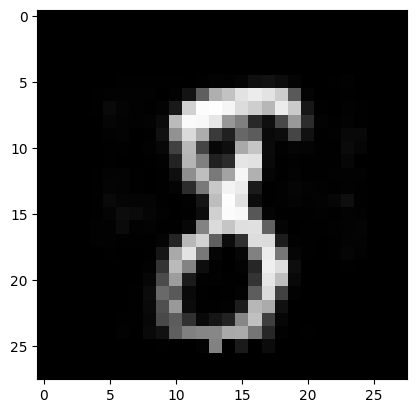

Train Epoch: [6/100], Loss: 0.0154
Train Epoch: [6/100], Loss: 0.0156
Train Epoch: [6/100], Loss: 0.0154
Train Epoch: [6/100], Loss: 0.0158
Train Epoch: [6/100], Loss: 0.0158
Train Epoch: [6/100], Loss: 0.0161
Train Epoch: [6/100], Loss: 0.0153
Train Epoch: [6/100], Loss: 0.0153
Train Epoch: [6/100], Loss: 0.0148
Train Epoch: [6/100], Loss: 0.0154
Train Epoch: [6/100], Loss: 0.0158
Train Epoch: [6/100], Loss: 0.0158
Train Epoch: [6/100], Loss: 0.0156
Train Epoch: [6/100], Loss: 0.0166
Train Epoch: [6/100], Loss: 0.0156
Train Epoch: [6/100], Loss: 0.0156
Train Epoch: [6/100], Loss: 0.0154
Train Epoch: [6/100], Loss: 0.0152
Train Epoch: [6/100], Loss: 0.0150
Train Epoch: [6/100], Loss: 0.0154
Train Epoch: [6/100], Loss: 0.0158
Train Epoch: [6/100], Loss: 0.0156
Train Epoch: [6/100], Loss: 0.0149
Train Epoch: [6/100], Loss: 0.0150
Train Epoch: [6/100], Loss: 0.0151
Train Epoch: [6/100], Loss: 0.0148
Train Epoch: [6/100], Loss: 0.0145
Train Epoch: [6/100], Loss: 0.0151
Train Epoch: [6/100]

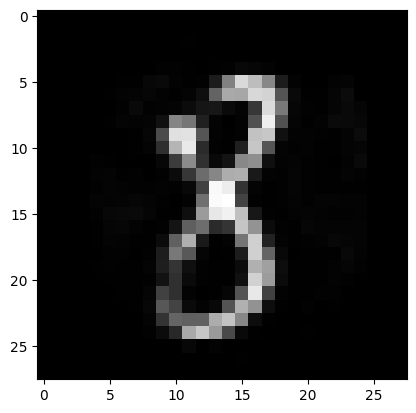

Train Epoch: [7/100], Loss: 0.0139
Train Epoch: [7/100], Loss: 0.0138
Train Epoch: [7/100], Loss: 0.0147
Train Epoch: [7/100], Loss: 0.0138
Train Epoch: [7/100], Loss: 0.0137
Train Epoch: [7/100], Loss: 0.0136
Train Epoch: [7/100], Loss: 0.0143
Train Epoch: [7/100], Loss: 0.0140
Train Epoch: [7/100], Loss: 0.0140
Train Epoch: [7/100], Loss: 0.0136
Train Epoch: [7/100], Loss: 0.0140
Train Epoch: [7/100], Loss: 0.0137
Train Epoch: [7/100], Loss: 0.0140
Train Epoch: [7/100], Loss: 0.0141
Train Epoch: [7/100], Loss: 0.0139
Train Epoch: [7/100], Loss: 0.0138
Train Epoch: [7/100], Loss: 0.0135
Train Epoch: [7/100], Loss: 0.0135
Train Epoch: [7/100], Loss: 0.0137
Train Epoch: [7/100], Loss: 0.0137
Train Epoch: [7/100], Loss: 0.0140
Train Epoch: [7/100], Loss: 0.0134
Train Epoch: [7/100], Loss: 0.0140
Train Epoch: [7/100], Loss: 0.0133
Train Epoch: [7/100], Loss: 0.0135
Train Epoch: [7/100], Loss: 0.0130
Train Epoch: [7/100], Loss: 0.0135
Train Epoch: [7/100], Loss: 0.0139
Train Epoch: [7/100]

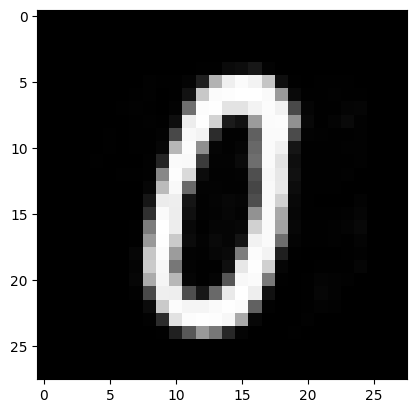

Train Epoch: [8/100], Loss: 0.0128
Train Epoch: [8/100], Loss: 0.0124
Train Epoch: [8/100], Loss: 0.0127
Train Epoch: [8/100], Loss: 0.0123
Train Epoch: [8/100], Loss: 0.0128
Train Epoch: [8/100], Loss: 0.0125
Train Epoch: [8/100], Loss: 0.0129
Train Epoch: [8/100], Loss: 0.0127
Train Epoch: [8/100], Loss: 0.0128
Train Epoch: [8/100], Loss: 0.0126
Train Epoch: [8/100], Loss: 0.0126
Train Epoch: [8/100], Loss: 0.0125
Train Epoch: [8/100], Loss: 0.0123
Train Epoch: [8/100], Loss: 0.0124
Train Epoch: [8/100], Loss: 0.0121
Train Epoch: [8/100], Loss: 0.0127
Train Epoch: [8/100], Loss: 0.0124
Train Epoch: [8/100], Loss: 0.0125
Train Epoch: [8/100], Loss: 0.0122
Train Epoch: [8/100], Loss: 0.0122
Train Epoch: [8/100], Loss: 0.0116
Train Epoch: [8/100], Loss: 0.0124
Train Epoch: [8/100], Loss: 0.0121
Train Epoch: [8/100], Loss: 0.0120
Train Epoch: [8/100], Loss: 0.0124
Train Epoch: [8/100], Loss: 0.0124
Train Epoch: [8/100], Loss: 0.0117
Train Epoch: [8/100], Loss: 0.0124
Train Epoch: [8/100]

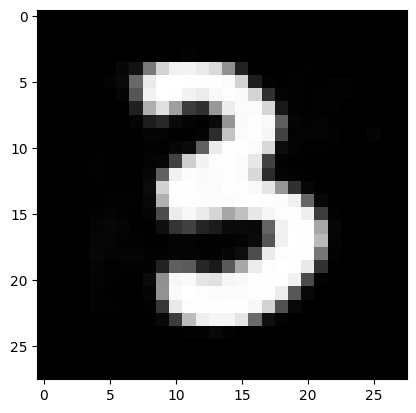

Train Epoch: [9/100], Loss: 0.0116
Train Epoch: [9/100], Loss: 0.0113
Train Epoch: [9/100], Loss: 0.0117
Train Epoch: [9/100], Loss: 0.0115
Train Epoch: [9/100], Loss: 0.0119
Train Epoch: [9/100], Loss: 0.0117
Train Epoch: [9/100], Loss: 0.0115
Train Epoch: [9/100], Loss: 0.0122
Train Epoch: [9/100], Loss: 0.0119
Train Epoch: [9/100], Loss: 0.0120
Train Epoch: [9/100], Loss: 0.0114
Train Epoch: [9/100], Loss: 0.0117
Train Epoch: [9/100], Loss: 0.0112
Train Epoch: [9/100], Loss: 0.0115
Train Epoch: [9/100], Loss: 0.0115
Train Epoch: [9/100], Loss: 0.0116
Train Epoch: [9/100], Loss: 0.0114
Train Epoch: [9/100], Loss: 0.0115
Train Epoch: [9/100], Loss: 0.0115
Train Epoch: [9/100], Loss: 0.0119
Train Epoch: [9/100], Loss: 0.0118
Train Epoch: [9/100], Loss: 0.0115
Train Epoch: [9/100], Loss: 0.0113
Train Epoch: [9/100], Loss: 0.0108
Train Epoch: [9/100], Loss: 0.0115
Train Epoch: [9/100], Loss: 0.0113
Train Epoch: [9/100], Loss: 0.0119
Train Epoch: [9/100], Loss: 0.0115
Train Epoch: [9/100]

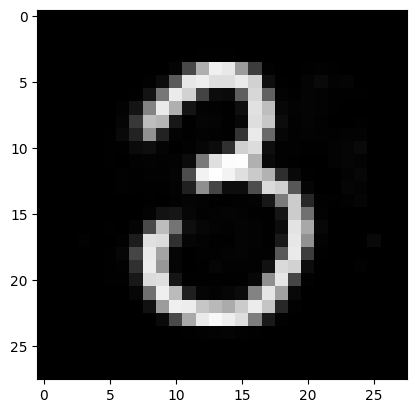

Train Epoch: [10/100], Loss: 0.0108
Train Epoch: [10/100], Loss: 0.0108
Train Epoch: [10/100], Loss: 0.0104
Train Epoch: [10/100], Loss: 0.0108
Train Epoch: [10/100], Loss: 0.0108
Train Epoch: [10/100], Loss: 0.0111
Train Epoch: [10/100], Loss: 0.0111
Train Epoch: [10/100], Loss: 0.0108
Train Epoch: [10/100], Loss: 0.0113
Train Epoch: [10/100], Loss: 0.0109
Train Epoch: [10/100], Loss: 0.0104
Train Epoch: [10/100], Loss: 0.0107
Train Epoch: [10/100], Loss: 0.0103
Train Epoch: [10/100], Loss: 0.0106
Train Epoch: [10/100], Loss: 0.0106
Train Epoch: [10/100], Loss: 0.0107
Train Epoch: [10/100], Loss: 0.0107
Train Epoch: [10/100], Loss: 0.0107
Train Epoch: [10/100], Loss: 0.0109
Train Epoch: [10/100], Loss: 0.0110
Train Epoch: [10/100], Loss: 0.0108
Train Epoch: [10/100], Loss: 0.0111
Train Epoch: [10/100], Loss: 0.0106
Train Epoch: [10/100], Loss: 0.0112
Train Epoch: [10/100], Loss: 0.0103
Train Epoch: [10/100], Loss: 0.0110
Train Epoch: [10/100], Loss: 0.0110
Train Epoch: [10/100], Loss:

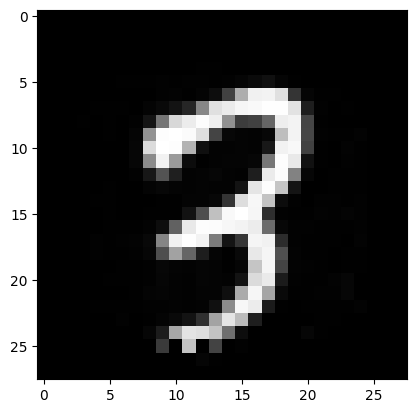

Train Epoch: [11/100], Loss: 0.0107
Train Epoch: [11/100], Loss: 0.0107
Train Epoch: [11/100], Loss: 0.0106
Train Epoch: [11/100], Loss: 0.0104
Train Epoch: [11/100], Loss: 0.0105
Train Epoch: [11/100], Loss: 0.0102
Train Epoch: [11/100], Loss: 0.0100
Train Epoch: [11/100], Loss: 0.0101
Train Epoch: [11/100], Loss: 0.0102
Train Epoch: [11/100], Loss: 0.0104
Train Epoch: [11/100], Loss: 0.0103
Train Epoch: [11/100], Loss: 0.0103
Train Epoch: [11/100], Loss: 0.0100
Train Epoch: [11/100], Loss: 0.0100
Train Epoch: [11/100], Loss: 0.0095
Train Epoch: [11/100], Loss: 0.0098
Train Epoch: [11/100], Loss: 0.0099
Train Epoch: [11/100], Loss: 0.0103
Train Epoch: [11/100], Loss: 0.0102
Train Epoch: [11/100], Loss: 0.0098
Train Epoch: [11/100], Loss: 0.0103
Train Epoch: [11/100], Loss: 0.0102
Train Epoch: [11/100], Loss: 0.0097
Train Epoch: [11/100], Loss: 0.0097
Train Epoch: [11/100], Loss: 0.0098
Train Epoch: [11/100], Loss: 0.0098
Train Epoch: [11/100], Loss: 0.0100
Train Epoch: [11/100], Loss:

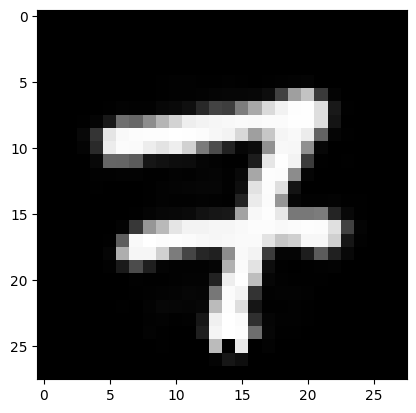

Train Epoch: [12/100], Loss: 0.0095
Train Epoch: [12/100], Loss: 0.0100
Train Epoch: [12/100], Loss: 0.0098
Train Epoch: [12/100], Loss: 0.0098
Train Epoch: [12/100], Loss: 0.0095
Train Epoch: [12/100], Loss: 0.0098
Train Epoch: [12/100], Loss: 0.0097
Train Epoch: [12/100], Loss: 0.0090
Train Epoch: [12/100], Loss: 0.0097
Train Epoch: [12/100], Loss: 0.0097
Train Epoch: [12/100], Loss: 0.0099
Train Epoch: [12/100], Loss: 0.0095
Train Epoch: [12/100], Loss: 0.0097
Train Epoch: [12/100], Loss: 0.0096
Train Epoch: [12/100], Loss: 0.0094
Train Epoch: [12/100], Loss: 0.0097
Train Epoch: [12/100], Loss: 0.0093
Train Epoch: [12/100], Loss: 0.0098
Train Epoch: [12/100], Loss: 0.0098
Train Epoch: [12/100], Loss: 0.0093
Train Epoch: [12/100], Loss: 0.0093
Train Epoch: [12/100], Loss: 0.0099
Train Epoch: [12/100], Loss: 0.0094
Train Epoch: [12/100], Loss: 0.0095
Train Epoch: [12/100], Loss: 0.0099
Train Epoch: [12/100], Loss: 0.0098
Train Epoch: [12/100], Loss: 0.0095
Train Epoch: [12/100], Loss:

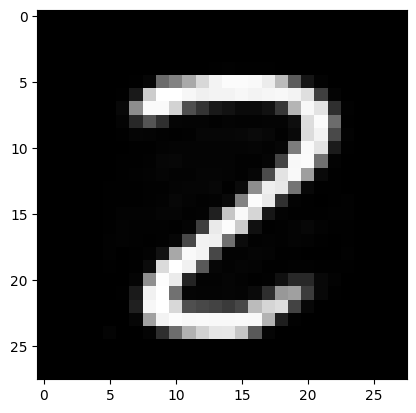

Train Epoch: [13/100], Loss: 0.0093
Train Epoch: [13/100], Loss: 0.0091
Train Epoch: [13/100], Loss: 0.0095
Train Epoch: [13/100], Loss: 0.0095
Train Epoch: [13/100], Loss: 0.0093
Train Epoch: [13/100], Loss: 0.0094
Train Epoch: [13/100], Loss: 0.0090
Train Epoch: [13/100], Loss: 0.0093
Train Epoch: [13/100], Loss: 0.0089
Train Epoch: [13/100], Loss: 0.0092
Train Epoch: [13/100], Loss: 0.0091
Train Epoch: [13/100], Loss: 0.0091
Train Epoch: [13/100], Loss: 0.0092
Train Epoch: [13/100], Loss: 0.0092
Train Epoch: [13/100], Loss: 0.0087
Train Epoch: [13/100], Loss: 0.0092
Train Epoch: [13/100], Loss: 0.0095
Train Epoch: [13/100], Loss: 0.0095
Train Epoch: [13/100], Loss: 0.0087
Train Epoch: [13/100], Loss: 0.0089
Train Epoch: [13/100], Loss: 0.0092
Train Epoch: [13/100], Loss: 0.0089
Train Epoch: [13/100], Loss: 0.0088
Train Epoch: [13/100], Loss: 0.0087
Train Epoch: [13/100], Loss: 0.0093
Train Epoch: [13/100], Loss: 0.0088
Train Epoch: [13/100], Loss: 0.0091
Train Epoch: [13/100], Loss:

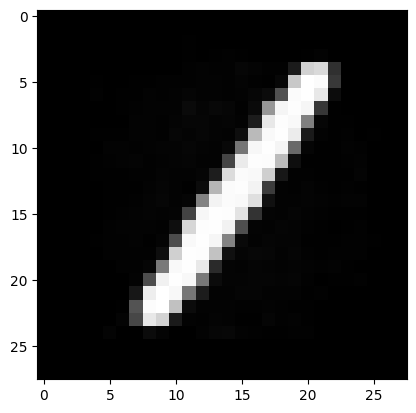

Train Epoch: [14/100], Loss: 0.0087
Train Epoch: [14/100], Loss: 0.0084
Train Epoch: [14/100], Loss: 0.0086
Train Epoch: [14/100], Loss: 0.0088
Train Epoch: [14/100], Loss: 0.0087
Train Epoch: [14/100], Loss: 0.0084
Train Epoch: [14/100], Loss: 0.0086
Train Epoch: [14/100], Loss: 0.0084
Train Epoch: [14/100], Loss: 0.0082
Train Epoch: [14/100], Loss: 0.0084
Train Epoch: [14/100], Loss: 0.0086
Train Epoch: [14/100], Loss: 0.0084
Train Epoch: [14/100], Loss: 0.0087
Train Epoch: [14/100], Loss: 0.0083
Train Epoch: [14/100], Loss: 0.0086
Train Epoch: [14/100], Loss: 0.0081
Train Epoch: [14/100], Loss: 0.0084
Train Epoch: [14/100], Loss: 0.0087
Train Epoch: [14/100], Loss: 0.0081
Train Epoch: [14/100], Loss: 0.0081
Train Epoch: [14/100], Loss: 0.0087
Train Epoch: [14/100], Loss: 0.0086
Train Epoch: [14/100], Loss: 0.0087
Train Epoch: [14/100], Loss: 0.0086
Train Epoch: [14/100], Loss: 0.0087
Train Epoch: [14/100], Loss: 0.0087
Train Epoch: [14/100], Loss: 0.0089
Train Epoch: [14/100], Loss:

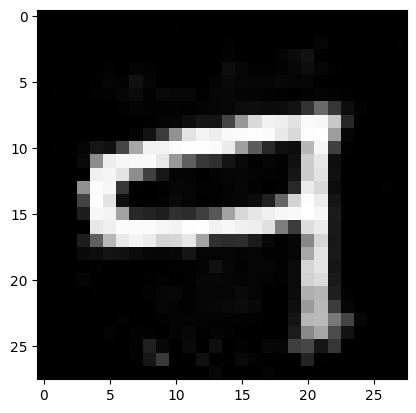

Train Epoch: [15/100], Loss: 0.0083
Train Epoch: [15/100], Loss: 0.0083
Train Epoch: [15/100], Loss: 0.0085
Train Epoch: [15/100], Loss: 0.0083
Train Epoch: [15/100], Loss: 0.0079
Train Epoch: [15/100], Loss: 0.0082
Train Epoch: [15/100], Loss: 0.0084
Train Epoch: [15/100], Loss: 0.0082
Train Epoch: [15/100], Loss: 0.0083
Train Epoch: [15/100], Loss: 0.0082
Train Epoch: [15/100], Loss: 0.0079
Train Epoch: [15/100], Loss: 0.0084
Train Epoch: [15/100], Loss: 0.0083
Train Epoch: [15/100], Loss: 0.0083
Train Epoch: [15/100], Loss: 0.0084
Train Epoch: [15/100], Loss: 0.0083
Train Epoch: [15/100], Loss: 0.0080
Train Epoch: [15/100], Loss: 0.0079
Train Epoch: [15/100], Loss: 0.0081
Train Epoch: [15/100], Loss: 0.0083
Train Epoch: [15/100], Loss: 0.0080
Train Epoch: [15/100], Loss: 0.0083
Train Epoch: [15/100], Loss: 0.0084
Train Epoch: [15/100], Loss: 0.0085
Train Epoch: [15/100], Loss: 0.0081
Train Epoch: [15/100], Loss: 0.0081
Train Epoch: [15/100], Loss: 0.0079
Train Epoch: [15/100], Loss:

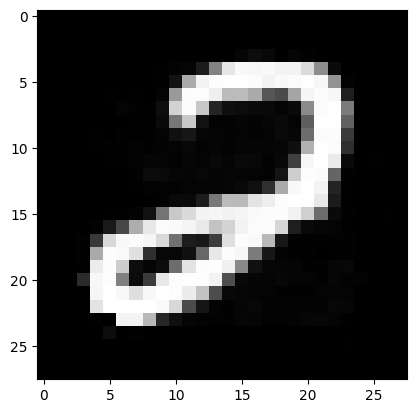

Train Epoch: [16/100], Loss: 0.0081
Train Epoch: [16/100], Loss: 0.0077
Train Epoch: [16/100], Loss: 0.0081
Train Epoch: [16/100], Loss: 0.0077
Train Epoch: [16/100], Loss: 0.0081
Train Epoch: [16/100], Loss: 0.0078
Train Epoch: [16/100], Loss: 0.0079
Train Epoch: [16/100], Loss: 0.0077
Train Epoch: [16/100], Loss: 0.0081
Train Epoch: [16/100], Loss: 0.0078
Train Epoch: [16/100], Loss: 0.0081
Train Epoch: [16/100], Loss: 0.0082
Train Epoch: [16/100], Loss: 0.0077
Train Epoch: [16/100], Loss: 0.0082
Train Epoch: [16/100], Loss: 0.0081
Train Epoch: [16/100], Loss: 0.0079
Train Epoch: [16/100], Loss: 0.0079
Train Epoch: [16/100], Loss: 0.0079
Train Epoch: [16/100], Loss: 0.0079
Train Epoch: [16/100], Loss: 0.0081
Train Epoch: [16/100], Loss: 0.0078
Train Epoch: [16/100], Loss: 0.0078
Train Epoch: [16/100], Loss: 0.0080
Train Epoch: [16/100], Loss: 0.0078
Train Epoch: [16/100], Loss: 0.0076
Train Epoch: [16/100], Loss: 0.0079
Train Epoch: [16/100], Loss: 0.0080
Train Epoch: [16/100], Loss:

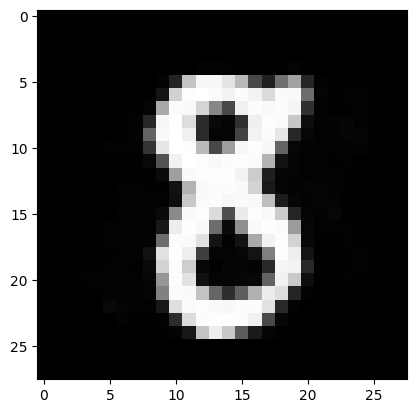

Train Epoch: [17/100], Loss: 0.0077
Train Epoch: [17/100], Loss: 0.0074
Train Epoch: [17/100], Loss: 0.0076
Train Epoch: [17/100], Loss: 0.0075
Train Epoch: [17/100], Loss: 0.0076
Train Epoch: [17/100], Loss: 0.0079
Train Epoch: [17/100], Loss: 0.0074
Train Epoch: [17/100], Loss: 0.0072
Train Epoch: [17/100], Loss: 0.0074
Train Epoch: [17/100], Loss: 0.0075
Train Epoch: [17/100], Loss: 0.0072
Train Epoch: [17/100], Loss: 0.0076
Train Epoch: [17/100], Loss: 0.0077
Train Epoch: [17/100], Loss: 0.0075
Train Epoch: [17/100], Loss: 0.0072
Train Epoch: [17/100], Loss: 0.0073
Train Epoch: [17/100], Loss: 0.0074
Train Epoch: [17/100], Loss: 0.0072
Train Epoch: [17/100], Loss: 0.0076
Train Epoch: [17/100], Loss: 0.0077
Train Epoch: [17/100], Loss: 0.0077
Train Epoch: [17/100], Loss: 0.0077
Train Epoch: [17/100], Loss: 0.0073
Train Epoch: [17/100], Loss: 0.0076
Train Epoch: [17/100], Loss: 0.0075
Train Epoch: [17/100], Loss: 0.0079
Train Epoch: [17/100], Loss: 0.0076
Train Epoch: [17/100], Loss:

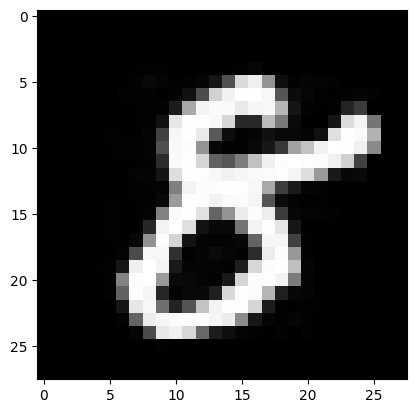

Train Epoch: [18/100], Loss: 0.0075
Train Epoch: [18/100], Loss: 0.0072
Train Epoch: [18/100], Loss: 0.0072
Train Epoch: [18/100], Loss: 0.0074
Train Epoch: [18/100], Loss: 0.0076
Train Epoch: [18/100], Loss: 0.0074
Train Epoch: [18/100], Loss: 0.0073
Train Epoch: [18/100], Loss: 0.0072
Train Epoch: [18/100], Loss: 0.0072
Train Epoch: [18/100], Loss: 0.0073
Train Epoch: [18/100], Loss: 0.0074
Train Epoch: [18/100], Loss: 0.0076
Train Epoch: [18/100], Loss: 0.0072
Train Epoch: [18/100], Loss: 0.0075
Train Epoch: [18/100], Loss: 0.0072
Train Epoch: [18/100], Loss: 0.0071
Train Epoch: [18/100], Loss: 0.0072
Train Epoch: [18/100], Loss: 0.0074
Train Epoch: [18/100], Loss: 0.0073
Train Epoch: [18/100], Loss: 0.0070
Train Epoch: [18/100], Loss: 0.0073
Train Epoch: [18/100], Loss: 0.0076
Train Epoch: [18/100], Loss: 0.0070
Train Epoch: [18/100], Loss: 0.0073
Train Epoch: [18/100], Loss: 0.0071
Train Epoch: [18/100], Loss: 0.0073
Train Epoch: [18/100], Loss: 0.0070
Train Epoch: [18/100], Loss:

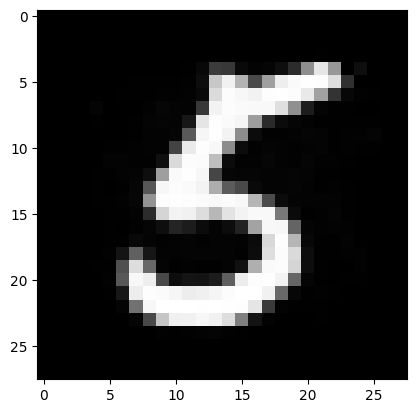

Train Epoch: [19/100], Loss: 0.0072
Train Epoch: [19/100], Loss: 0.0071
Train Epoch: [19/100], Loss: 0.0073
Train Epoch: [19/100], Loss: 0.0073
Train Epoch: [19/100], Loss: 0.0073
Train Epoch: [19/100], Loss: 0.0071
Train Epoch: [19/100], Loss: 0.0072
Train Epoch: [19/100], Loss: 0.0074
Train Epoch: [19/100], Loss: 0.0072
Train Epoch: [19/100], Loss: 0.0072
Train Epoch: [19/100], Loss: 0.0069
Train Epoch: [19/100], Loss: 0.0069
Train Epoch: [19/100], Loss: 0.0071
Train Epoch: [19/100], Loss: 0.0069
Train Epoch: [19/100], Loss: 0.0072
Train Epoch: [19/100], Loss: 0.0066
Train Epoch: [19/100], Loss: 0.0070
Train Epoch: [19/100], Loss: 0.0069
Train Epoch: [19/100], Loss: 0.0069
Train Epoch: [19/100], Loss: 0.0066
Train Epoch: [19/100], Loss: 0.0073
Train Epoch: [19/100], Loss: 0.0068
Train Epoch: [19/100], Loss: 0.0068
Train Epoch: [19/100], Loss: 0.0071
Train Epoch: [19/100], Loss: 0.0071
Train Epoch: [19/100], Loss: 0.0071
Train Epoch: [19/100], Loss: 0.0068
Train Epoch: [19/100], Loss:

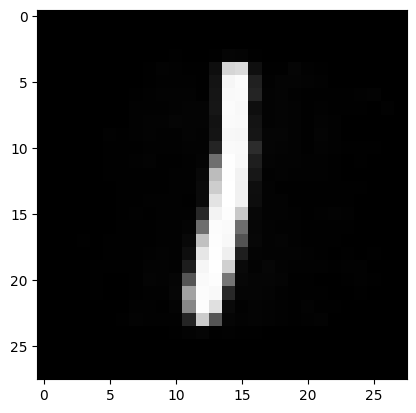

Train Epoch: [20/100], Loss: 0.0068
Train Epoch: [20/100], Loss: 0.0070
Train Epoch: [20/100], Loss: 0.0069
Train Epoch: [20/100], Loss: 0.0069
Train Epoch: [20/100], Loss: 0.0067
Train Epoch: [20/100], Loss: 0.0068
Train Epoch: [20/100], Loss: 0.0064
Train Epoch: [20/100], Loss: 0.0066
Train Epoch: [20/100], Loss: 0.0070
Train Epoch: [20/100], Loss: 0.0069
Train Epoch: [20/100], Loss: 0.0066
Train Epoch: [20/100], Loss: 0.0068
Train Epoch: [20/100], Loss: 0.0071
Train Epoch: [20/100], Loss: 0.0066
Train Epoch: [20/100], Loss: 0.0071
Train Epoch: [20/100], Loss: 0.0072
Train Epoch: [20/100], Loss: 0.0073
Train Epoch: [20/100], Loss: 0.0072
Train Epoch: [20/100], Loss: 0.0074
Train Epoch: [20/100], Loss: 0.0069
Train Epoch: [20/100], Loss: 0.0069
Train Epoch: [20/100], Loss: 0.0069
Train Epoch: [20/100], Loss: 0.0067
Train Epoch: [20/100], Loss: 0.0067
Train Epoch: [20/100], Loss: 0.0067
Train Epoch: [20/100], Loss: 0.0069
Train Epoch: [20/100], Loss: 0.0067
Train Epoch: [20/100], Loss:

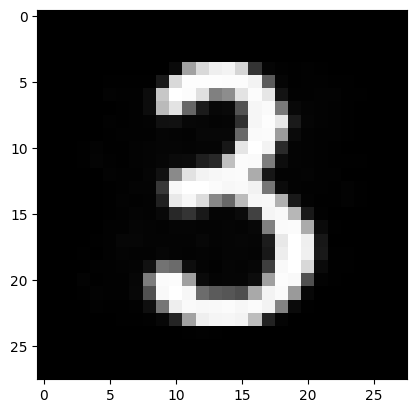

Train Epoch: [21/100], Loss: 0.0067
Train Epoch: [21/100], Loss: 0.0067
Train Epoch: [21/100], Loss: 0.0066
Train Epoch: [21/100], Loss: 0.0067
Train Epoch: [21/100], Loss: 0.0067
Train Epoch: [21/100], Loss: 0.0066
Train Epoch: [21/100], Loss: 0.0068
Train Epoch: [21/100], Loss: 0.0066
Train Epoch: [21/100], Loss: 0.0066
Train Epoch: [21/100], Loss: 0.0065
Train Epoch: [21/100], Loss: 0.0068
Train Epoch: [21/100], Loss: 0.0067
Train Epoch: [21/100], Loss: 0.0066
Train Epoch: [21/100], Loss: 0.0064
Train Epoch: [21/100], Loss: 0.0066
Train Epoch: [21/100], Loss: 0.0066
Train Epoch: [21/100], Loss: 0.0065
Train Epoch: [21/100], Loss: 0.0070
Train Epoch: [21/100], Loss: 0.0063
Train Epoch: [21/100], Loss: 0.0067
Train Epoch: [21/100], Loss: 0.0067
Train Epoch: [21/100], Loss: 0.0065
Train Epoch: [21/100], Loss: 0.0064
Train Epoch: [21/100], Loss: 0.0066
Train Epoch: [21/100], Loss: 0.0068
Train Epoch: [21/100], Loss: 0.0066
Train Epoch: [21/100], Loss: 0.0064
Train Epoch: [21/100], Loss:

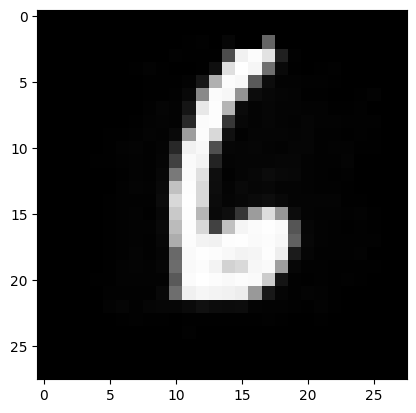

Train Epoch: [22/100], Loss: 0.0066
Train Epoch: [22/100], Loss: 0.0064
Train Epoch: [22/100], Loss: 0.0064
Train Epoch: [22/100], Loss: 0.0064
Train Epoch: [22/100], Loss: 0.0064
Train Epoch: [22/100], Loss: 0.0064
Train Epoch: [22/100], Loss: 0.0063
Train Epoch: [22/100], Loss: 0.0063
Train Epoch: [22/100], Loss: 0.0064
Train Epoch: [22/100], Loss: 0.0063
Train Epoch: [22/100], Loss: 0.0066
Train Epoch: [22/100], Loss: 0.0064
Train Epoch: [22/100], Loss: 0.0064
Train Epoch: [22/100], Loss: 0.0064
Train Epoch: [22/100], Loss: 0.0068
Train Epoch: [22/100], Loss: 0.0062
Train Epoch: [22/100], Loss: 0.0063
Train Epoch: [22/100], Loss: 0.0064
Train Epoch: [22/100], Loss: 0.0063
Train Epoch: [22/100], Loss: 0.0064
Train Epoch: [22/100], Loss: 0.0064
Train Epoch: [22/100], Loss: 0.0065
Train Epoch: [22/100], Loss: 0.0065
Train Epoch: [22/100], Loss: 0.0067
Train Epoch: [22/100], Loss: 0.0065
Train Epoch: [22/100], Loss: 0.0064
Train Epoch: [22/100], Loss: 0.0064
Train Epoch: [22/100], Loss:

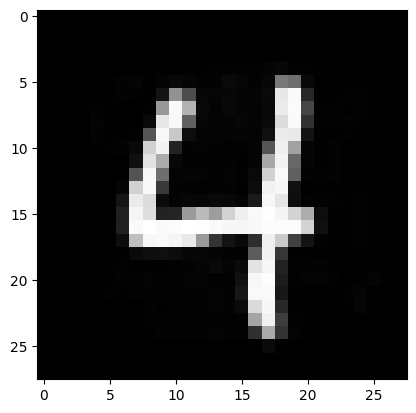

Train Epoch: [23/100], Loss: 0.0060
Train Epoch: [23/100], Loss: 0.0063
Train Epoch: [23/100], Loss: 0.0062
Train Epoch: [23/100], Loss: 0.0063
Train Epoch: [23/100], Loss: 0.0064
Train Epoch: [23/100], Loss: 0.0062
Train Epoch: [23/100], Loss: 0.0064
Train Epoch: [23/100], Loss: 0.0060
Train Epoch: [23/100], Loss: 0.0062
Train Epoch: [23/100], Loss: 0.0062
Train Epoch: [23/100], Loss: 0.0066
Train Epoch: [23/100], Loss: 0.0066
Train Epoch: [23/100], Loss: 0.0069
Train Epoch: [23/100], Loss: 0.0073
Train Epoch: [23/100], Loss: 0.0074
Train Epoch: [23/100], Loss: 0.0076
Train Epoch: [23/100], Loss: 0.0074
Train Epoch: [23/100], Loss: 0.0074
Train Epoch: [23/100], Loss: 0.0066
Train Epoch: [23/100], Loss: 0.0063
Train Epoch: [23/100], Loss: 0.0063
Train Epoch: [23/100], Loss: 0.0067
Train Epoch: [23/100], Loss: 0.0064
Train Epoch: [23/100], Loss: 0.0062
Train Epoch: [23/100], Loss: 0.0064
Train Epoch: [23/100], Loss: 0.0063
Train Epoch: [23/100], Loss: 0.0061
Train Epoch: [23/100], Loss:

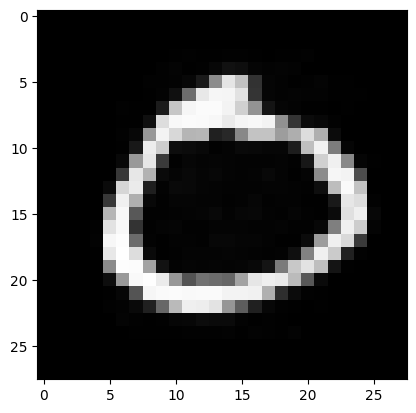

Train Epoch: [24/100], Loss: 0.0064
Train Epoch: [24/100], Loss: 0.0063
Train Epoch: [24/100], Loss: 0.0061
Train Epoch: [24/100], Loss: 0.0062
Train Epoch: [24/100], Loss: 0.0061
Train Epoch: [24/100], Loss: 0.0061
Train Epoch: [24/100], Loss: 0.0063
Train Epoch: [24/100], Loss: 0.0063
Train Epoch: [24/100], Loss: 0.0066
Train Epoch: [24/100], Loss: 0.0066
Train Epoch: [24/100], Loss: 0.0067
Train Epoch: [24/100], Loss: 0.0067
Train Epoch: [24/100], Loss: 0.0066
Train Epoch: [24/100], Loss: 0.0067
Train Epoch: [24/100], Loss: 0.0063
Train Epoch: [24/100], Loss: 0.0064
Train Epoch: [24/100], Loss: 0.0065
Train Epoch: [24/100], Loss: 0.0062
Train Epoch: [24/100], Loss: 0.0062
Train Epoch: [24/100], Loss: 0.0060
Train Epoch: [24/100], Loss: 0.0063
Train Epoch: [24/100], Loss: 0.0064
Train Epoch: [24/100], Loss: 0.0064
Train Epoch: [24/100], Loss: 0.0063
Train Epoch: [24/100], Loss: 0.0062
Train Epoch: [24/100], Loss: 0.0061
Train Epoch: [24/100], Loss: 0.0062
Train Epoch: [24/100], Loss:

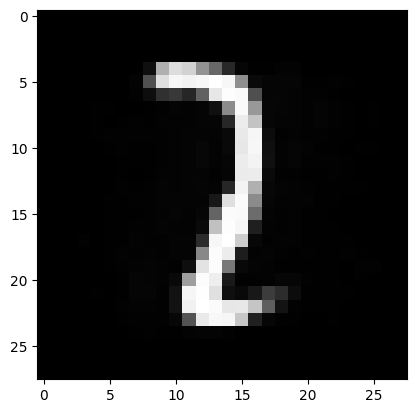

Train Epoch: [25/100], Loss: 0.0067
Train Epoch: [25/100], Loss: 0.0064
Train Epoch: [25/100], Loss: 0.0062
Train Epoch: [25/100], Loss: 0.0060
Train Epoch: [25/100], Loss: 0.0059
Train Epoch: [25/100], Loss: 0.0058
Train Epoch: [25/100], Loss: 0.0059
Train Epoch: [25/100], Loss: 0.0063
Train Epoch: [25/100], Loss: 0.0061
Train Epoch: [25/100], Loss: 0.0062
Train Epoch: [25/100], Loss: 0.0058
Train Epoch: [25/100], Loss: 0.0058
Train Epoch: [25/100], Loss: 0.0057
Train Epoch: [25/100], Loss: 0.0059
Train Epoch: [25/100], Loss: 0.0059
Train Epoch: [25/100], Loss: 0.0059
Train Epoch: [25/100], Loss: 0.0061
Train Epoch: [25/100], Loss: 0.0058
Train Epoch: [25/100], Loss: 0.0057
Train Epoch: [25/100], Loss: 0.0059
Train Epoch: [25/100], Loss: 0.0057
Train Epoch: [25/100], Loss: 0.0061
Train Epoch: [25/100], Loss: 0.0059
Train Epoch: [25/100], Loss: 0.0061
Train Epoch: [25/100], Loss: 0.0059
Train Epoch: [25/100], Loss: 0.0058
Train Epoch: [25/100], Loss: 0.0058
Train Epoch: [25/100], Loss:

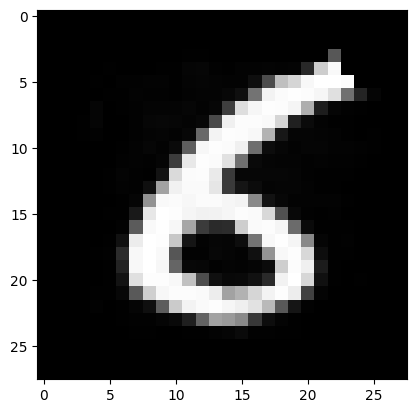

Train Epoch: [26/100], Loss: 0.0058
Train Epoch: [26/100], Loss: 0.0056
Train Epoch: [26/100], Loss: 0.0059
Train Epoch: [26/100], Loss: 0.0057
Train Epoch: [26/100], Loss: 0.0056
Train Epoch: [26/100], Loss: 0.0057
Train Epoch: [26/100], Loss: 0.0060
Train Epoch: [26/100], Loss: 0.0059
Train Epoch: [26/100], Loss: 0.0057
Train Epoch: [26/100], Loss: 0.0056
Train Epoch: [26/100], Loss: 0.0059
Train Epoch: [26/100], Loss: 0.0059
Train Epoch: [26/100], Loss: 0.0060
Train Epoch: [26/100], Loss: 0.0060
Train Epoch: [26/100], Loss: 0.0057
Train Epoch: [26/100], Loss: 0.0058
Train Epoch: [26/100], Loss: 0.0058
Train Epoch: [26/100], Loss: 0.0061
Train Epoch: [26/100], Loss: 0.0062
Train Epoch: [26/100], Loss: 0.0062
Train Epoch: [26/100], Loss: 0.0061
Train Epoch: [26/100], Loss: 0.0064
Train Epoch: [26/100], Loss: 0.0065
Train Epoch: [26/100], Loss: 0.0065
Train Epoch: [26/100], Loss: 0.0064
Train Epoch: [26/100], Loss: 0.0060
Train Epoch: [26/100], Loss: 0.0059
Train Epoch: [26/100], Loss:

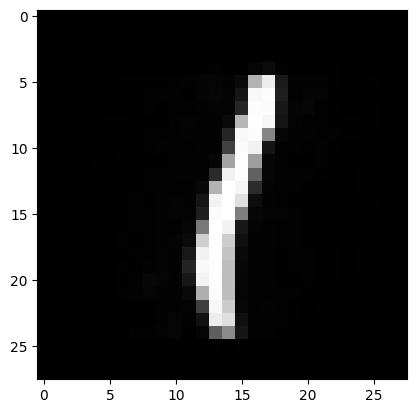

Train Epoch: [27/100], Loss: 0.0057
Train Epoch: [27/100], Loss: 0.0060
Train Epoch: [27/100], Loss: 0.0057
Train Epoch: [27/100], Loss: 0.0056
Train Epoch: [27/100], Loss: 0.0056
Train Epoch: [27/100], Loss: 0.0059
Train Epoch: [27/100], Loss: 0.0057
Train Epoch: [27/100], Loss: 0.0057
Train Epoch: [27/100], Loss: 0.0057
Train Epoch: [27/100], Loss: 0.0059
Train Epoch: [27/100], Loss: 0.0060
Train Epoch: [27/100], Loss: 0.0060
Train Epoch: [27/100], Loss: 0.0062
Train Epoch: [27/100], Loss: 0.0061
Train Epoch: [27/100], Loss: 0.0062
Train Epoch: [27/100], Loss: 0.0059
Train Epoch: [27/100], Loss: 0.0061
Train Epoch: [27/100], Loss: 0.0057
Train Epoch: [27/100], Loss: 0.0058
Train Epoch: [27/100], Loss: 0.0055
Train Epoch: [27/100], Loss: 0.0058
Train Epoch: [27/100], Loss: 0.0059
Train Epoch: [27/100], Loss: 0.0058
Train Epoch: [27/100], Loss: 0.0058
Train Epoch: [27/100], Loss: 0.0058
Train Epoch: [27/100], Loss: 0.0058
Train Epoch: [27/100], Loss: 0.0056
Train Epoch: [27/100], Loss:

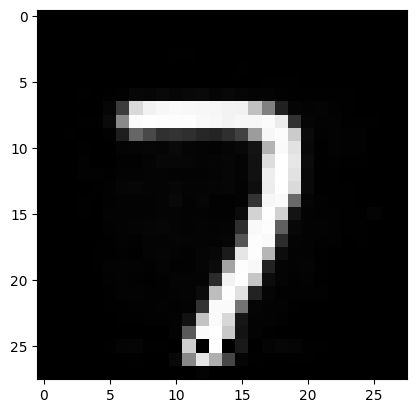

Train Epoch: [28/100], Loss: 0.0059
Train Epoch: [28/100], Loss: 0.0057
Train Epoch: [28/100], Loss: 0.0060
Train Epoch: [28/100], Loss: 0.0059
Train Epoch: [28/100], Loss: 0.0060
Train Epoch: [28/100], Loss: 0.0058
Train Epoch: [28/100], Loss: 0.0058
Train Epoch: [28/100], Loss: 0.0059
Train Epoch: [28/100], Loss: 0.0056
Train Epoch: [28/100], Loss: 0.0057
Train Epoch: [28/100], Loss: 0.0056
Train Epoch: [28/100], Loss: 0.0055
Train Epoch: [28/100], Loss: 0.0057
Train Epoch: [28/100], Loss: 0.0056
Train Epoch: [28/100], Loss: 0.0054
Train Epoch: [28/100], Loss: 0.0056
Train Epoch: [28/100], Loss: 0.0057
Train Epoch: [28/100], Loss: 0.0054
Train Epoch: [28/100], Loss: 0.0056
Train Epoch: [28/100], Loss: 0.0057
Train Epoch: [28/100], Loss: 0.0056
Train Epoch: [28/100], Loss: 0.0054
Train Epoch: [28/100], Loss: 0.0056
Train Epoch: [28/100], Loss: 0.0055
Train Epoch: [28/100], Loss: 0.0054
Train Epoch: [28/100], Loss: 0.0057
Train Epoch: [28/100], Loss: 0.0054
Train Epoch: [28/100], Loss:

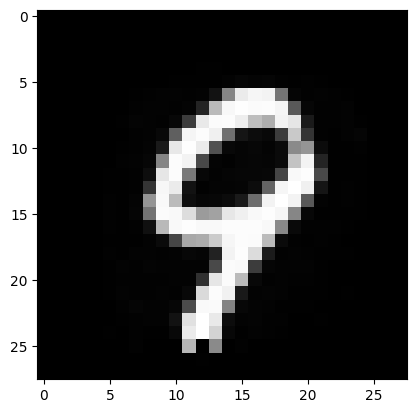

Train Epoch: [29/100], Loss: 0.0056
Train Epoch: [29/100], Loss: 0.0056
Train Epoch: [29/100], Loss: 0.0058
Train Epoch: [29/100], Loss: 0.0057
Train Epoch: [29/100], Loss: 0.0056
Train Epoch: [29/100], Loss: 0.0057
Train Epoch: [29/100], Loss: 0.0058
Train Epoch: [29/100], Loss: 0.0056
Train Epoch: [29/100], Loss: 0.0058
Train Epoch: [29/100], Loss: 0.0057
Train Epoch: [29/100], Loss: 0.0059
Train Epoch: [29/100], Loss: 0.0057
Train Epoch: [29/100], Loss: 0.0059
Train Epoch: [29/100], Loss: 0.0059
Train Epoch: [29/100], Loss: 0.0057
Train Epoch: [29/100], Loss: 0.0057
Train Epoch: [29/100], Loss: 0.0058
Train Epoch: [29/100], Loss: 0.0056
Train Epoch: [29/100], Loss: 0.0057
Train Epoch: [29/100], Loss: 0.0056
Train Epoch: [29/100], Loss: 0.0058
Train Epoch: [29/100], Loss: 0.0056
Train Epoch: [29/100], Loss: 0.0056
Train Epoch: [29/100], Loss: 0.0054
Train Epoch: [29/100], Loss: 0.0056
Train Epoch: [29/100], Loss: 0.0057
Train Epoch: [29/100], Loss: 0.0055
Train Epoch: [29/100], Loss:

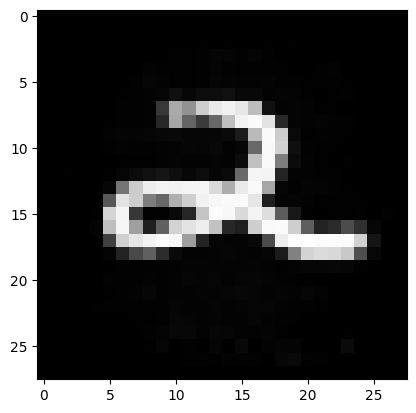

Train Epoch: [30/100], Loss: 0.0055
Train Epoch: [30/100], Loss: 0.0057
Train Epoch: [30/100], Loss: 0.0055
Train Epoch: [30/100], Loss: 0.0055
Train Epoch: [30/100], Loss: 0.0051
Train Epoch: [30/100], Loss: 0.0055
Train Epoch: [30/100], Loss: 0.0056
Train Epoch: [30/100], Loss: 0.0056
Train Epoch: [30/100], Loss: 0.0054
Train Epoch: [30/100], Loss: 0.0055
Train Epoch: [30/100], Loss: 0.0053
Train Epoch: [30/100], Loss: 0.0054
Train Epoch: [30/100], Loss: 0.0054
Train Epoch: [30/100], Loss: 0.0055
Train Epoch: [30/100], Loss: 0.0055
Train Epoch: [30/100], Loss: 0.0054
Train Epoch: [30/100], Loss: 0.0054
Train Epoch: [30/100], Loss: 0.0055
Train Epoch: [30/100], Loss: 0.0056
Train Epoch: [30/100], Loss: 0.0055
Train Epoch: [30/100], Loss: 0.0055
Train Epoch: [30/100], Loss: 0.0053
Train Epoch: [30/100], Loss: 0.0056
Train Epoch: [30/100], Loss: 0.0055
Train Epoch: [30/100], Loss: 0.0055
Train Epoch: [30/100], Loss: 0.0057
Train Epoch: [30/100], Loss: 0.0056
Train Epoch: [30/100], Loss:

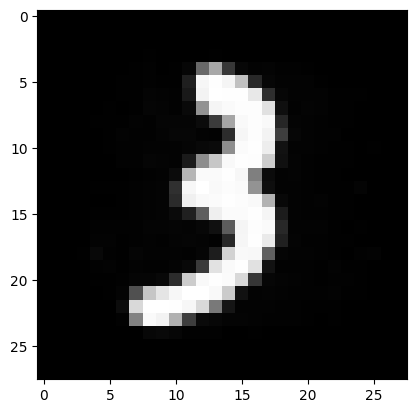

Train Epoch: [31/100], Loss: 0.0054
Train Epoch: [31/100], Loss: 0.0052
Train Epoch: [31/100], Loss: 0.0056
Train Epoch: [31/100], Loss: 0.0054
Train Epoch: [31/100], Loss: 0.0057
Train Epoch: [31/100], Loss: 0.0057
Train Epoch: [31/100], Loss: 0.0055
Train Epoch: [31/100], Loss: 0.0055
Train Epoch: [31/100], Loss: 0.0055
Train Epoch: [31/100], Loss: 0.0054
Train Epoch: [31/100], Loss: 0.0055
Train Epoch: [31/100], Loss: 0.0055
Train Epoch: [31/100], Loss: 0.0053
Train Epoch: [31/100], Loss: 0.0054
Train Epoch: [31/100], Loss: 0.0055
Train Epoch: [31/100], Loss: 0.0054
Train Epoch: [31/100], Loss: 0.0055
Train Epoch: [31/100], Loss: 0.0054
Train Epoch: [31/100], Loss: 0.0060
Train Epoch: [31/100], Loss: 0.0061
Train Epoch: [31/100], Loss: 0.0058
Train Epoch: [31/100], Loss: 0.0058
Train Epoch: [31/100], Loss: 0.0056
Train Epoch: [31/100], Loss: 0.0059
Train Epoch: [31/100], Loss: 0.0058
Train Epoch: [31/100], Loss: 0.0058
Train Epoch: [31/100], Loss: 0.0058
Train Epoch: [31/100], Loss:

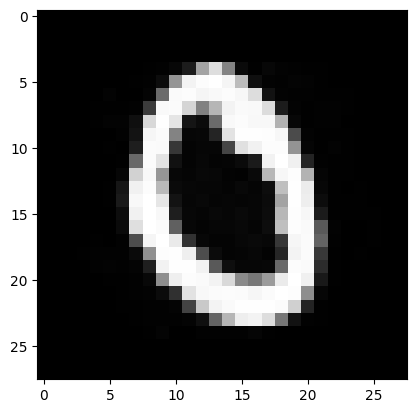

Train Epoch: [32/100], Loss: 0.0053
Train Epoch: [32/100], Loss: 0.0055
Train Epoch: [32/100], Loss: 0.0054
Train Epoch: [32/100], Loss: 0.0054
Train Epoch: [32/100], Loss: 0.0056
Train Epoch: [32/100], Loss: 0.0055
Train Epoch: [32/100], Loss: 0.0054
Train Epoch: [32/100], Loss: 0.0053
Train Epoch: [32/100], Loss: 0.0054
Train Epoch: [32/100], Loss: 0.0056
Train Epoch: [32/100], Loss: 0.0054
Train Epoch: [32/100], Loss: 0.0053
Train Epoch: [32/100], Loss: 0.0052
Train Epoch: [32/100], Loss: 0.0050
Train Epoch: [32/100], Loss: 0.0054
Train Epoch: [32/100], Loss: 0.0053
Train Epoch: [32/100], Loss: 0.0053
Train Epoch: [32/100], Loss: 0.0052
Train Epoch: [32/100], Loss: 0.0051
Train Epoch: [32/100], Loss: 0.0051
Train Epoch: [32/100], Loss: 0.0052
Train Epoch: [32/100], Loss: 0.0054
Train Epoch: [32/100], Loss: 0.0054
Train Epoch: [32/100], Loss: 0.0053
Train Epoch: [32/100], Loss: 0.0053
Train Epoch: [32/100], Loss: 0.0052
Train Epoch: [32/100], Loss: 0.0053
Train Epoch: [32/100], Loss:

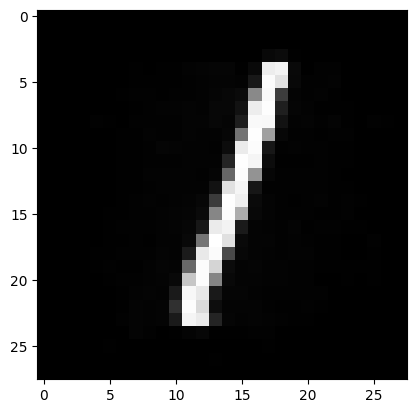

Train Epoch: [33/100], Loss: 0.0053
Train Epoch: [33/100], Loss: 0.0051
Train Epoch: [33/100], Loss: 0.0051
Train Epoch: [33/100], Loss: 0.0051
Train Epoch: [33/100], Loss: 0.0055
Train Epoch: [33/100], Loss: 0.0053
Train Epoch: [33/100], Loss: 0.0054
Train Epoch: [33/100], Loss: 0.0052
Train Epoch: [33/100], Loss: 0.0051
Train Epoch: [33/100], Loss: 0.0051
Train Epoch: [33/100], Loss: 0.0053
Train Epoch: [33/100], Loss: 0.0052
Train Epoch: [33/100], Loss: 0.0053
Train Epoch: [33/100], Loss: 0.0055
Train Epoch: [33/100], Loss: 0.0060
Train Epoch: [33/100], Loss: 0.0065
Train Epoch: [33/100], Loss: 0.0074
Train Epoch: [33/100], Loss: 0.0085
Train Epoch: [33/100], Loss: 0.0082
Train Epoch: [33/100], Loss: 0.0069
Train Epoch: [33/100], Loss: 0.0061
Train Epoch: [33/100], Loss: 0.0063
Train Epoch: [33/100], Loss: 0.0063
Train Epoch: [33/100], Loss: 0.0055
Train Epoch: [33/100], Loss: 0.0061
Train Epoch: [33/100], Loss: 0.0061
Train Epoch: [33/100], Loss: 0.0055
Train Epoch: [33/100], Loss:

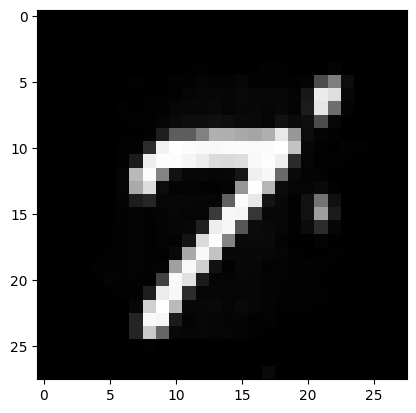

Train Epoch: [34/100], Loss: 0.0060
Train Epoch: [34/100], Loss: 0.0059
Train Epoch: [34/100], Loss: 0.0055
Train Epoch: [34/100], Loss: 0.0053
Train Epoch: [34/100], Loss: 0.0053
Train Epoch: [34/100], Loss: 0.0056
Train Epoch: [34/100], Loss: 0.0055
Train Epoch: [34/100], Loss: 0.0053
Train Epoch: [34/100], Loss: 0.0053
Train Epoch: [34/100], Loss: 0.0055
Train Epoch: [34/100], Loss: 0.0052
Train Epoch: [34/100], Loss: 0.0052
Train Epoch: [34/100], Loss: 0.0055
Train Epoch: [34/100], Loss: 0.0052
Train Epoch: [34/100], Loss: 0.0054
Train Epoch: [34/100], Loss: 0.0053
Train Epoch: [34/100], Loss: 0.0050
Train Epoch: [34/100], Loss: 0.0053
Train Epoch: [34/100], Loss: 0.0053
Train Epoch: [34/100], Loss: 0.0051
Train Epoch: [34/100], Loss: 0.0053
Train Epoch: [34/100], Loss: 0.0050
Train Epoch: [34/100], Loss: 0.0053
Train Epoch: [34/100], Loss: 0.0051
Train Epoch: [34/100], Loss: 0.0050
Train Epoch: [34/100], Loss: 0.0052
Train Epoch: [34/100], Loss: 0.0053
Train Epoch: [34/100], Loss:

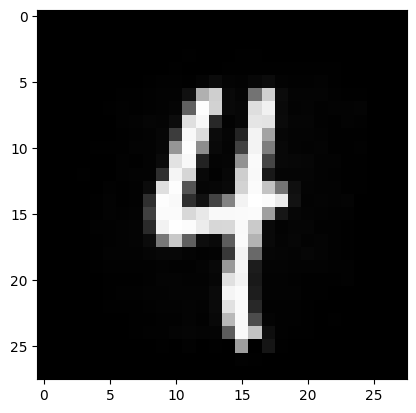

Train Epoch: [35/100], Loss: 0.0052
Train Epoch: [35/100], Loss: 0.0052
Train Epoch: [35/100], Loss: 0.0051
Train Epoch: [35/100], Loss: 0.0053
Train Epoch: [35/100], Loss: 0.0050
Train Epoch: [35/100], Loss: 0.0051
Train Epoch: [35/100], Loss: 0.0049
Train Epoch: [35/100], Loss: 0.0052
Train Epoch: [35/100], Loss: 0.0051
Train Epoch: [35/100], Loss: 0.0052
Train Epoch: [35/100], Loss: 0.0053
Train Epoch: [35/100], Loss: 0.0051
Train Epoch: [35/100], Loss: 0.0051
Train Epoch: [35/100], Loss: 0.0051
Train Epoch: [35/100], Loss: 0.0049
Train Epoch: [35/100], Loss: 0.0053
Train Epoch: [35/100], Loss: 0.0051
Train Epoch: [35/100], Loss: 0.0054
Train Epoch: [35/100], Loss: 0.0055
Train Epoch: [35/100], Loss: 0.0058
Train Epoch: [35/100], Loss: 0.0059
Train Epoch: [35/100], Loss: 0.0062
Train Epoch: [35/100], Loss: 0.0063
Train Epoch: [35/100], Loss: 0.0063
Train Epoch: [35/100], Loss: 0.0059
Train Epoch: [35/100], Loss: 0.0054
Train Epoch: [35/100], Loss: 0.0053
Train Epoch: [35/100], Loss:

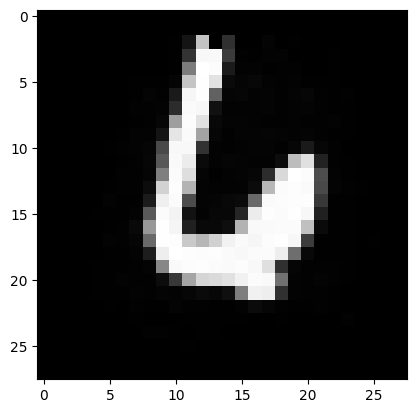

Train Epoch: [36/100], Loss: 0.0056
Train Epoch: [36/100], Loss: 0.0061
Train Epoch: [36/100], Loss: 0.0072
Train Epoch: [36/100], Loss: 0.0091
Train Epoch: [36/100], Loss: 0.0125
Train Epoch: [36/100], Loss: 0.0168
Train Epoch: [36/100], Loss: 0.0152
Train Epoch: [36/100], Loss: 0.0137
Train Epoch: [36/100], Loss: 0.0129
Train Epoch: [36/100], Loss: 0.0084
Train Epoch: [36/100], Loss: 0.0120
Train Epoch: [36/100], Loss: 0.0089
Train Epoch: [36/100], Loss: 0.0102
Train Epoch: [36/100], Loss: 0.0090
Train Epoch: [36/100], Loss: 0.0090
Train Epoch: [36/100], Loss: 0.0085
Train Epoch: [36/100], Loss: 0.0085
Train Epoch: [36/100], Loss: 0.0081
Train Epoch: [36/100], Loss: 0.0076
Train Epoch: [36/100], Loss: 0.0073
Train Epoch: [36/100], Loss: 0.0072
Train Epoch: [36/100], Loss: 0.0072
Train Epoch: [36/100], Loss: 0.0068
Train Epoch: [36/100], Loss: 0.0066
Train Epoch: [36/100], Loss: 0.0069
Train Epoch: [36/100], Loss: 0.0063
Train Epoch: [36/100], Loss: 0.0065
Train Epoch: [36/100], Loss:

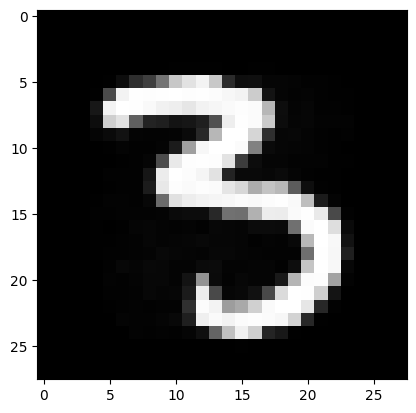

Train Epoch: [37/100], Loss: 0.0050
Train Epoch: [37/100], Loss: 0.0052
Train Epoch: [37/100], Loss: 0.0051
Train Epoch: [37/100], Loss: 0.0049
Train Epoch: [37/100], Loss: 0.0051
Train Epoch: [37/100], Loss: 0.0053
Train Epoch: [37/100], Loss: 0.0051
Train Epoch: [37/100], Loss: 0.0050
Train Epoch: [37/100], Loss: 0.0051
Train Epoch: [37/100], Loss: 0.0052
Train Epoch: [37/100], Loss: 0.0052
Train Epoch: [37/100], Loss: 0.0051
Train Epoch: [37/100], Loss: 0.0049
Train Epoch: [37/100], Loss: 0.0049
Train Epoch: [37/100], Loss: 0.0050
Train Epoch: [37/100], Loss: 0.0051
Train Epoch: [37/100], Loss: 0.0050
Train Epoch: [37/100], Loss: 0.0053
Train Epoch: [37/100], Loss: 0.0051
Train Epoch: [37/100], Loss: 0.0050
Train Epoch: [37/100], Loss: 0.0051
Train Epoch: [37/100], Loss: 0.0051
Train Epoch: [37/100], Loss: 0.0052
Train Epoch: [37/100], Loss: 0.0051
Train Epoch: [37/100], Loss: 0.0051
Train Epoch: [37/100], Loss: 0.0051
Train Epoch: [37/100], Loss: 0.0048
Train Epoch: [37/100], Loss:

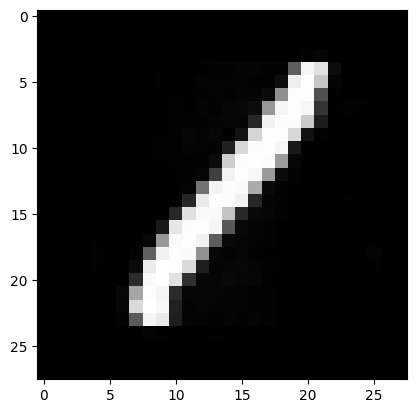

Train Epoch: [38/100], Loss: 0.0049
Train Epoch: [38/100], Loss: 0.0049
Train Epoch: [38/100], Loss: 0.0050
Train Epoch: [38/100], Loss: 0.0051
Train Epoch: [38/100], Loss: 0.0051
Train Epoch: [38/100], Loss: 0.0049
Train Epoch: [38/100], Loss: 0.0054
Train Epoch: [38/100], Loss: 0.0049
Train Epoch: [38/100], Loss: 0.0051
Train Epoch: [38/100], Loss: 0.0047
Train Epoch: [38/100], Loss: 0.0050
Train Epoch: [38/100], Loss: 0.0050
Train Epoch: [38/100], Loss: 0.0051
Train Epoch: [38/100], Loss: 0.0050
Train Epoch: [38/100], Loss: 0.0051
Train Epoch: [38/100], Loss: 0.0054
Train Epoch: [38/100], Loss: 0.0050
Train Epoch: [38/100], Loss: 0.0052
Train Epoch: [38/100], Loss: 0.0052
Train Epoch: [38/100], Loss: 0.0054
Train Epoch: [38/100], Loss: 0.0052
Train Epoch: [38/100], Loss: 0.0051
Train Epoch: [38/100], Loss: 0.0050
Train Epoch: [38/100], Loss: 0.0050
Train Epoch: [38/100], Loss: 0.0050
Train Epoch: [38/100], Loss: 0.0051
Train Epoch: [38/100], Loss: 0.0050
Train Epoch: [38/100], Loss:

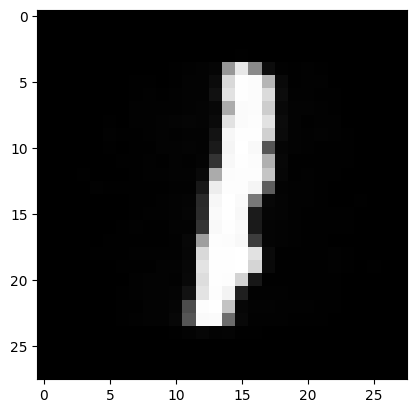

Train Epoch: [39/100], Loss: 0.0050
Train Epoch: [39/100], Loss: 0.0051
Train Epoch: [39/100], Loss: 0.0050
Train Epoch: [39/100], Loss: 0.0050
Train Epoch: [39/100], Loss: 0.0051
Train Epoch: [39/100], Loss: 0.0051
Train Epoch: [39/100], Loss: 0.0051
Train Epoch: [39/100], Loss: 0.0050
Train Epoch: [39/100], Loss: 0.0049
Train Epoch: [39/100], Loss: 0.0050
Train Epoch: [39/100], Loss: 0.0050
Train Epoch: [39/100], Loss: 0.0050
Train Epoch: [39/100], Loss: 0.0050
Train Epoch: [39/100], Loss: 0.0050
Train Epoch: [39/100], Loss: 0.0051
Train Epoch: [39/100], Loss: 0.0050
Train Epoch: [39/100], Loss: 0.0050
Train Epoch: [39/100], Loss: 0.0052
Train Epoch: [39/100], Loss: 0.0051
Train Epoch: [39/100], Loss: 0.0049
Train Epoch: [39/100], Loss: 0.0050
Train Epoch: [39/100], Loss: 0.0053
Train Epoch: [39/100], Loss: 0.0051
Train Epoch: [39/100], Loss: 0.0052
Train Epoch: [39/100], Loss: 0.0053
Train Epoch: [39/100], Loss: 0.0049
Train Epoch: [39/100], Loss: 0.0051
Train Epoch: [39/100], Loss:

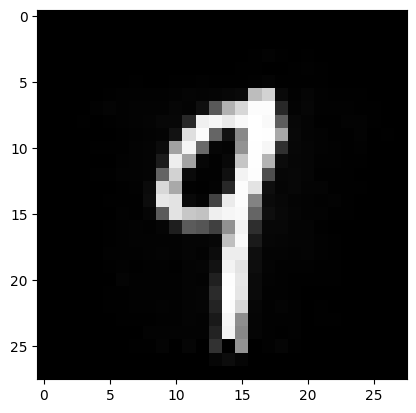

Train Epoch: [40/100], Loss: 0.0055
Train Epoch: [40/100], Loss: 0.0054
Train Epoch: [40/100], Loss: 0.0050
Train Epoch: [40/100], Loss: 0.0051
Train Epoch: [40/100], Loss: 0.0052
Train Epoch: [40/100], Loss: 0.0051
Train Epoch: [40/100], Loss: 0.0052
Train Epoch: [40/100], Loss: 0.0051
Train Epoch: [40/100], Loss: 0.0049
Train Epoch: [40/100], Loss: 0.0050
Train Epoch: [40/100], Loss: 0.0049
Train Epoch: [40/100], Loss: 0.0048
Train Epoch: [40/100], Loss: 0.0049
Train Epoch: [40/100], Loss: 0.0049
Train Epoch: [40/100], Loss: 0.0048
Train Epoch: [40/100], Loss: 0.0049
Train Epoch: [40/100], Loss: 0.0049
Train Epoch: [40/100], Loss: 0.0049
Train Epoch: [40/100], Loss: 0.0048
Train Epoch: [40/100], Loss: 0.0049
Train Epoch: [40/100], Loss: 0.0049
Train Epoch: [40/100], Loss: 0.0051
Train Epoch: [40/100], Loss: 0.0049
Train Epoch: [40/100], Loss: 0.0046
Train Epoch: [40/100], Loss: 0.0049
Train Epoch: [40/100], Loss: 0.0048
Train Epoch: [40/100], Loss: 0.0050
Train Epoch: [40/100], Loss:

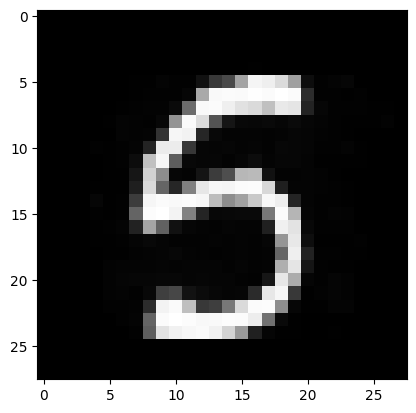

Train Epoch: [41/100], Loss: 0.0048
Train Epoch: [41/100], Loss: 0.0048
Train Epoch: [41/100], Loss: 0.0048
Train Epoch: [41/100], Loss: 0.0048
Train Epoch: [41/100], Loss: 0.0049
Train Epoch: [41/100], Loss: 0.0049
Train Epoch: [41/100], Loss: 0.0049
Train Epoch: [41/100], Loss: 0.0049
Train Epoch: [41/100], Loss: 0.0049
Train Epoch: [41/100], Loss: 0.0049
Train Epoch: [41/100], Loss: 0.0048
Train Epoch: [41/100], Loss: 0.0048
Train Epoch: [41/100], Loss: 0.0050
Train Epoch: [41/100], Loss: 0.0047
Train Epoch: [41/100], Loss: 0.0047
Train Epoch: [41/100], Loss: 0.0048
Train Epoch: [41/100], Loss: 0.0048
Train Epoch: [41/100], Loss: 0.0048
Train Epoch: [41/100], Loss: 0.0049
Train Epoch: [41/100], Loss: 0.0048
Train Epoch: [41/100], Loss: 0.0050
Train Epoch: [41/100], Loss: 0.0049
Train Epoch: [41/100], Loss: 0.0051
Train Epoch: [41/100], Loss: 0.0049
Train Epoch: [41/100], Loss: 0.0050
Train Epoch: [41/100], Loss: 0.0049
Train Epoch: [41/100], Loss: 0.0051
Train Epoch: [41/100], Loss:

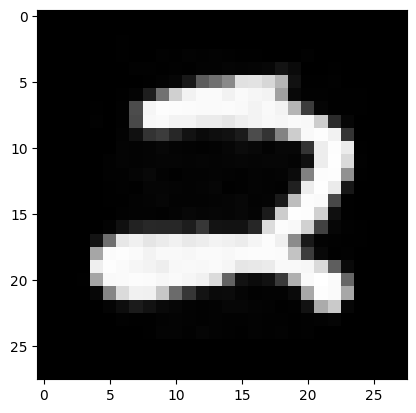

Train Epoch: [42/100], Loss: 0.0049
Train Epoch: [42/100], Loss: 0.0048
Train Epoch: [42/100], Loss: 0.0048
Train Epoch: [42/100], Loss: 0.0047
Train Epoch: [42/100], Loss: 0.0048
Train Epoch: [42/100], Loss: 0.0048
Train Epoch: [42/100], Loss: 0.0048
Train Epoch: [42/100], Loss: 0.0050
Train Epoch: [42/100], Loss: 0.0050
Train Epoch: [42/100], Loss: 0.0048
Train Epoch: [42/100], Loss: 0.0048
Train Epoch: [42/100], Loss: 0.0051
Train Epoch: [42/100], Loss: 0.0050
Train Epoch: [42/100], Loss: 0.0050
Train Epoch: [42/100], Loss: 0.0050
Train Epoch: [42/100], Loss: 0.0051
Train Epoch: [42/100], Loss: 0.0051
Train Epoch: [42/100], Loss: 0.0052
Train Epoch: [42/100], Loss: 0.0051
Train Epoch: [42/100], Loss: 0.0052
Train Epoch: [42/100], Loss: 0.0052
Train Epoch: [42/100], Loss: 0.0053
Train Epoch: [42/100], Loss: 0.0050
Train Epoch: [42/100], Loss: 0.0050
Train Epoch: [42/100], Loss: 0.0049
Train Epoch: [42/100], Loss: 0.0050
Train Epoch: [42/100], Loss: 0.0049
Train Epoch: [42/100], Loss:

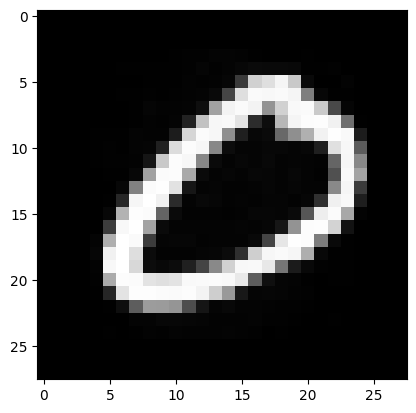

Train Epoch: [43/100], Loss: 0.0048
Train Epoch: [43/100], Loss: 0.0050
Train Epoch: [43/100], Loss: 0.0049
Train Epoch: [43/100], Loss: 0.0050
Train Epoch: [43/100], Loss: 0.0049
Train Epoch: [43/100], Loss: 0.0049
Train Epoch: [43/100], Loss: 0.0048
Train Epoch: [43/100], Loss: 0.0046
Train Epoch: [43/100], Loss: 0.0047
Train Epoch: [43/100], Loss: 0.0050
Train Epoch: [43/100], Loss: 0.0049
Train Epoch: [43/100], Loss: 0.0049
Train Epoch: [43/100], Loss: 0.0048
Train Epoch: [43/100], Loss: 0.0047
Train Epoch: [43/100], Loss: 0.0047
Train Epoch: [43/100], Loss: 0.0047
Train Epoch: [43/100], Loss: 0.0049
Train Epoch: [43/100], Loss: 0.0050
Train Epoch: [43/100], Loss: 0.0047
Train Epoch: [43/100], Loss: 0.0045
Train Epoch: [43/100], Loss: 0.0048
Train Epoch: [43/100], Loss: 0.0049
Train Epoch: [43/100], Loss: 0.0047
Train Epoch: [43/100], Loss: 0.0048
Train Epoch: [43/100], Loss: 0.0049
Train Epoch: [43/100], Loss: 0.0050
Train Epoch: [43/100], Loss: 0.0047
Train Epoch: [43/100], Loss:

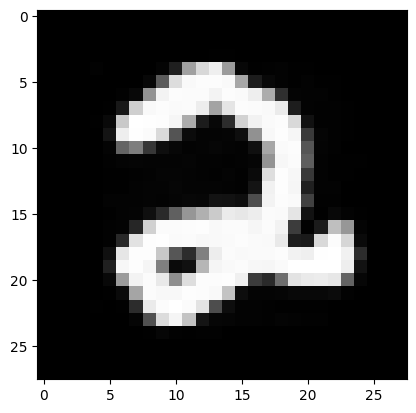

Train Epoch: [44/100], Loss: 0.0046
Train Epoch: [44/100], Loss: 0.0046
Train Epoch: [44/100], Loss: 0.0047
Train Epoch: [44/100], Loss: 0.0047
Train Epoch: [44/100], Loss: 0.0047
Train Epoch: [44/100], Loss: 0.0046
Train Epoch: [44/100], Loss: 0.0047
Train Epoch: [44/100], Loss: 0.0046
Train Epoch: [44/100], Loss: 0.0048
Train Epoch: [44/100], Loss: 0.0047
Train Epoch: [44/100], Loss: 0.0047
Train Epoch: [44/100], Loss: 0.0048
Train Epoch: [44/100], Loss: 0.0053
Train Epoch: [44/100], Loss: 0.0053
Train Epoch: [44/100], Loss: 0.0055
Train Epoch: [44/100], Loss: 0.0057
Train Epoch: [44/100], Loss: 0.0059
Train Epoch: [44/100], Loss: 0.0059
Train Epoch: [44/100], Loss: 0.0060
Train Epoch: [44/100], Loss: 0.0056
Train Epoch: [44/100], Loss: 0.0056
Train Epoch: [44/100], Loss: 0.0060
Train Epoch: [44/100], Loss: 0.0056
Train Epoch: [44/100], Loss: 0.0053
Train Epoch: [44/100], Loss: 0.0049
Train Epoch: [44/100], Loss: 0.0049
Train Epoch: [44/100], Loss: 0.0050
Train Epoch: [44/100], Loss:

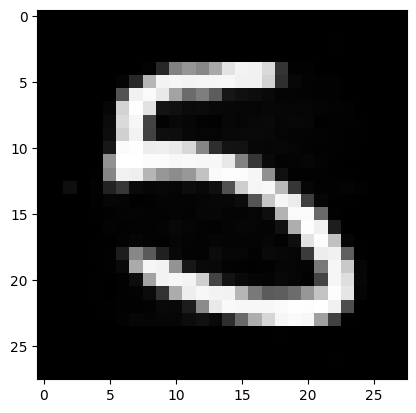

Train Epoch: [45/100], Loss: 0.0050
Train Epoch: [45/100], Loss: 0.0048
Train Epoch: [45/100], Loss: 0.0049
Train Epoch: [45/100], Loss: 0.0050
Train Epoch: [45/100], Loss: 0.0047
Train Epoch: [45/100], Loss: 0.0047
Train Epoch: [45/100], Loss: 0.0048
Train Epoch: [45/100], Loss: 0.0050
Train Epoch: [45/100], Loss: 0.0052
Train Epoch: [45/100], Loss: 0.0054
Train Epoch: [45/100], Loss: 0.0055
Train Epoch: [45/100], Loss: 0.0055
Train Epoch: [45/100], Loss: 0.0053
Train Epoch: [45/100], Loss: 0.0050
Train Epoch: [45/100], Loss: 0.0048
Train Epoch: [45/100], Loss: 0.0048
Train Epoch: [45/100], Loss: 0.0050
Train Epoch: [45/100], Loss: 0.0049
Train Epoch: [45/100], Loss: 0.0048
Train Epoch: [45/100], Loss: 0.0049
Train Epoch: [45/100], Loss: 0.0048
Train Epoch: [45/100], Loss: 0.0048
Train Epoch: [45/100], Loss: 0.0047
Train Epoch: [45/100], Loss: 0.0046
Train Epoch: [45/100], Loss: 0.0048
Train Epoch: [45/100], Loss: 0.0046
Train Epoch: [45/100], Loss: 0.0048
Train Epoch: [45/100], Loss:

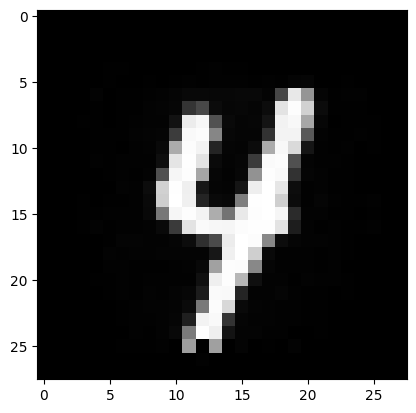

Train Epoch: [46/100], Loss: 0.0047
Train Epoch: [46/100], Loss: 0.0047
Train Epoch: [46/100], Loss: 0.0049
Train Epoch: [46/100], Loss: 0.0047
Train Epoch: [46/100], Loss: 0.0050
Train Epoch: [46/100], Loss: 0.0047
Train Epoch: [46/100], Loss: 0.0045
Train Epoch: [46/100], Loss: 0.0046
Train Epoch: [46/100], Loss: 0.0048
Train Epoch: [46/100], Loss: 0.0047
Train Epoch: [46/100], Loss: 0.0045
Train Epoch: [46/100], Loss: 0.0046
Train Epoch: [46/100], Loss: 0.0046
Train Epoch: [46/100], Loss: 0.0047
Train Epoch: [46/100], Loss: 0.0047
Train Epoch: [46/100], Loss: 0.0049
Train Epoch: [46/100], Loss: 0.0047
Train Epoch: [46/100], Loss: 0.0048
Train Epoch: [46/100], Loss: 0.0048
Train Epoch: [46/100], Loss: 0.0048
Train Epoch: [46/100], Loss: 0.0046
Train Epoch: [46/100], Loss: 0.0047
Train Epoch: [46/100], Loss: 0.0047
Train Epoch: [46/100], Loss: 0.0048
Train Epoch: [46/100], Loss: 0.0048
Train Epoch: [46/100], Loss: 0.0047
Train Epoch: [46/100], Loss: 0.0047
Train Epoch: [46/100], Loss:

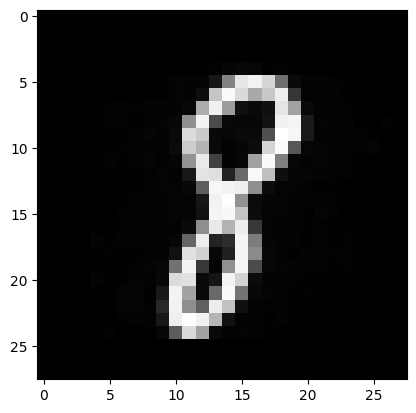

Train Epoch: [47/100], Loss: 0.0048
Train Epoch: [47/100], Loss: 0.0051
Train Epoch: [47/100], Loss: 0.0049
Train Epoch: [47/100], Loss: 0.0047
Train Epoch: [47/100], Loss: 0.0048
Train Epoch: [47/100], Loss: 0.0048
Train Epoch: [47/100], Loss: 0.0049
Train Epoch: [47/100], Loss: 0.0049
Train Epoch: [47/100], Loss: 0.0050
Train Epoch: [47/100], Loss: 0.0047
Train Epoch: [47/100], Loss: 0.0051
Train Epoch: [47/100], Loss: 0.0048
Train Epoch: [47/100], Loss: 0.0047
Train Epoch: [47/100], Loss: 0.0045
Train Epoch: [47/100], Loss: 0.0047
Train Epoch: [47/100], Loss: 0.0046
Train Epoch: [47/100], Loss: 0.0049
Train Epoch: [47/100], Loss: 0.0047
Train Epoch: [47/100], Loss: 0.0046
Train Epoch: [47/100], Loss: 0.0047
Train Epoch: [47/100], Loss: 0.0048
Train Epoch: [47/100], Loss: 0.0049
Train Epoch: [47/100], Loss: 0.0047
Train Epoch: [47/100], Loss: 0.0046
Train Epoch: [47/100], Loss: 0.0046
Train Epoch: [47/100], Loss: 0.0046
Train Epoch: [47/100], Loss: 0.0048
Train Epoch: [47/100], Loss:

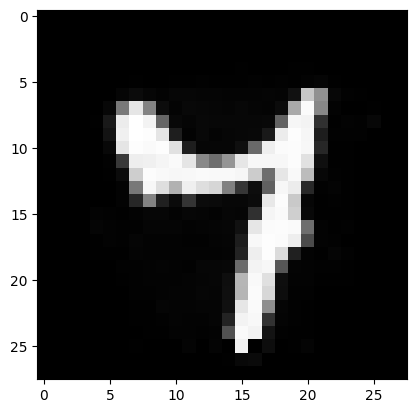

Train Epoch: [48/100], Loss: 0.0047
Train Epoch: [48/100], Loss: 0.0045
Train Epoch: [48/100], Loss: 0.0047
Train Epoch: [48/100], Loss: 0.0047
Train Epoch: [48/100], Loss: 0.0046
Train Epoch: [48/100], Loss: 0.0047
Train Epoch: [48/100], Loss: 0.0047
Train Epoch: [48/100], Loss: 0.0048
Train Epoch: [48/100], Loss: 0.0046
Train Epoch: [48/100], Loss: 0.0047
Train Epoch: [48/100], Loss: 0.0046
Train Epoch: [48/100], Loss: 0.0047
Train Epoch: [48/100], Loss: 0.0047
Train Epoch: [48/100], Loss: 0.0045
Train Epoch: [48/100], Loss: 0.0045
Train Epoch: [48/100], Loss: 0.0047
Train Epoch: [48/100], Loss: 0.0047
Train Epoch: [48/100], Loss: 0.0047
Train Epoch: [48/100], Loss: 0.0047
Train Epoch: [48/100], Loss: 0.0047
Train Epoch: [48/100], Loss: 0.0048
Train Epoch: [48/100], Loss: 0.0047
Train Epoch: [48/100], Loss: 0.0048
Train Epoch: [48/100], Loss: 0.0048
Train Epoch: [48/100], Loss: 0.0047
Train Epoch: [48/100], Loss: 0.0052
Train Epoch: [48/100], Loss: 0.0050
Train Epoch: [48/100], Loss:

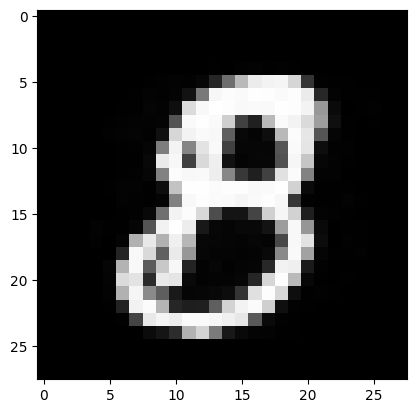

Train Epoch: [49/100], Loss: 0.0046
Train Epoch: [49/100], Loss: 0.0047
Train Epoch: [49/100], Loss: 0.0046
Train Epoch: [49/100], Loss: 0.0048
Train Epoch: [49/100], Loss: 0.0046
Train Epoch: [49/100], Loss: 0.0046
Train Epoch: [49/100], Loss: 0.0048
Train Epoch: [49/100], Loss: 0.0049
Train Epoch: [49/100], Loss: 0.0048
Train Epoch: [49/100], Loss: 0.0053
Train Epoch: [49/100], Loss: 0.0052
Train Epoch: [49/100], Loss: 0.0051
Train Epoch: [49/100], Loss: 0.0052
Train Epoch: [49/100], Loss: 0.0050
Train Epoch: [49/100], Loss: 0.0049
Train Epoch: [49/100], Loss: 0.0050
Train Epoch: [49/100], Loss: 0.0049
Train Epoch: [49/100], Loss: 0.0050
Train Epoch: [49/100], Loss: 0.0049
Train Epoch: [49/100], Loss: 0.0048
Train Epoch: [49/100], Loss: 0.0048
Train Epoch: [49/100], Loss: 0.0049
Train Epoch: [49/100], Loss: 0.0047
Train Epoch: [49/100], Loss: 0.0045
Train Epoch: [49/100], Loss: 0.0046
Train Epoch: [49/100], Loss: 0.0048
Train Epoch: [49/100], Loss: 0.0045
Train Epoch: [49/100], Loss:

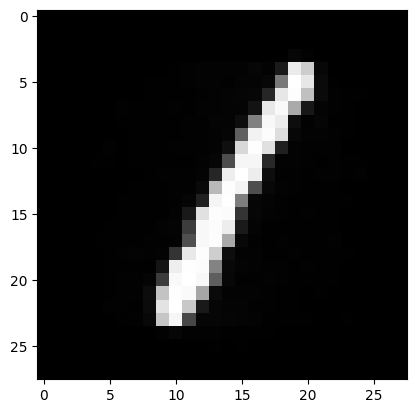

Train Epoch: [50/100], Loss: 0.0046
Train Epoch: [50/100], Loss: 0.0046
Train Epoch: [50/100], Loss: 0.0045
Train Epoch: [50/100], Loss: 0.0046
Train Epoch: [50/100], Loss: 0.0048
Train Epoch: [50/100], Loss: 0.0046
Train Epoch: [50/100], Loss: 0.0046
Train Epoch: [50/100], Loss: 0.0047
Train Epoch: [50/100], Loss: 0.0047
Train Epoch: [50/100], Loss: 0.0046
Train Epoch: [50/100], Loss: 0.0048
Train Epoch: [50/100], Loss: 0.0047
Train Epoch: [50/100], Loss: 0.0047
Train Epoch: [50/100], Loss: 0.0047
Train Epoch: [50/100], Loss: 0.0045
Train Epoch: [50/100], Loss: 0.0049
Train Epoch: [50/100], Loss: 0.0047
Train Epoch: [50/100], Loss: 0.0048
Train Epoch: [50/100], Loss: 0.0047
Train Epoch: [50/100], Loss: 0.0048
Train Epoch: [50/100], Loss: 0.0046
Train Epoch: [50/100], Loss: 0.0049
Train Epoch: [50/100], Loss: 0.0049
Train Epoch: [50/100], Loss: 0.0048
Train Epoch: [50/100], Loss: 0.0049
Train Epoch: [50/100], Loss: 0.0048
Train Epoch: [50/100], Loss: 0.0049
Train Epoch: [50/100], Loss:

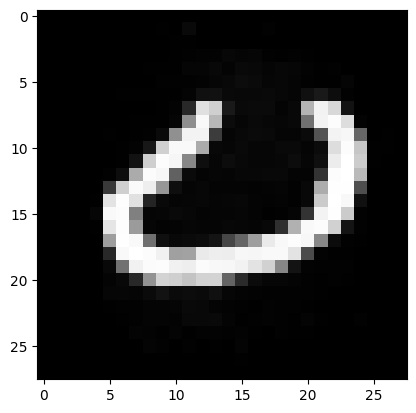

Train Epoch: [51/100], Loss: 0.0052
Train Epoch: [51/100], Loss: 0.0049
Train Epoch: [51/100], Loss: 0.0049
Train Epoch: [51/100], Loss: 0.0049
Train Epoch: [51/100], Loss: 0.0047
Train Epoch: [51/100], Loss: 0.0047
Train Epoch: [51/100], Loss: 0.0046
Train Epoch: [51/100], Loss: 0.0049
Train Epoch: [51/100], Loss: 0.0047
Train Epoch: [51/100], Loss: 0.0047
Train Epoch: [51/100], Loss: 0.0045
Train Epoch: [51/100], Loss: 0.0045
Train Epoch: [51/100], Loss: 0.0046
Train Epoch: [51/100], Loss: 0.0046
Train Epoch: [51/100], Loss: 0.0045
Train Epoch: [51/100], Loss: 0.0047
Train Epoch: [51/100], Loss: 0.0047
Train Epoch: [51/100], Loss: 0.0048
Train Epoch: [51/100], Loss: 0.0045
Train Epoch: [51/100], Loss: 0.0047
Train Epoch: [51/100], Loss: 0.0048
Train Epoch: [51/100], Loss: 0.0046
Train Epoch: [51/100], Loss: 0.0049
Train Epoch: [51/100], Loss: 0.0049
Train Epoch: [51/100], Loss: 0.0049
Train Epoch: [51/100], Loss: 0.0049
Train Epoch: [51/100], Loss: 0.0050
Train Epoch: [51/100], Loss:

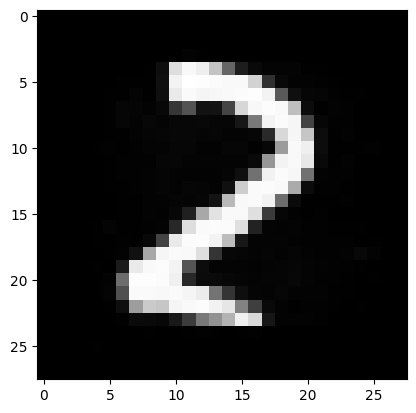

Train Epoch: [52/100], Loss: 0.0046
Train Epoch: [52/100], Loss: 0.0050
Train Epoch: [52/100], Loss: 0.0050
Train Epoch: [52/100], Loss: 0.0052
Train Epoch: [52/100], Loss: 0.0057
Train Epoch: [52/100], Loss: 0.0057
Train Epoch: [52/100], Loss: 0.0057
Train Epoch: [52/100], Loss: 0.0055
Train Epoch: [52/100], Loss: 0.0056
Train Epoch: [52/100], Loss: 0.0054
Train Epoch: [52/100], Loss: 0.0054
Train Epoch: [52/100], Loss: 0.0049
Train Epoch: [52/100], Loss: 0.0048
Train Epoch: [52/100], Loss: 0.0047
Train Epoch: [52/100], Loss: 0.0048
Train Epoch: [52/100], Loss: 0.0048
Train Epoch: [52/100], Loss: 0.0046
Train Epoch: [52/100], Loss: 0.0047
Train Epoch: [52/100], Loss: 0.0048
Train Epoch: [52/100], Loss: 0.0047
Train Epoch: [52/100], Loss: 0.0046
Train Epoch: [52/100], Loss: 0.0046
Train Epoch: [52/100], Loss: 0.0046
Train Epoch: [52/100], Loss: 0.0046
Train Epoch: [52/100], Loss: 0.0046
Train Epoch: [52/100], Loss: 0.0047
Train Epoch: [52/100], Loss: 0.0047
Train Epoch: [52/100], Loss:

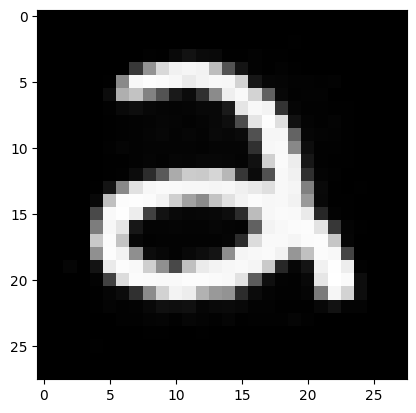

Train Epoch: [53/100], Loss: 0.0045
Train Epoch: [53/100], Loss: 0.0045
Train Epoch: [53/100], Loss: 0.0045
Train Epoch: [53/100], Loss: 0.0046
Train Epoch: [53/100], Loss: 0.0046
Train Epoch: [53/100], Loss: 0.0045
Train Epoch: [53/100], Loss: 0.0049
Train Epoch: [53/100], Loss: 0.0046
Train Epoch: [53/100], Loss: 0.0048
Train Epoch: [53/100], Loss: 0.0045
Train Epoch: [53/100], Loss: 0.0045
Train Epoch: [53/100], Loss: 0.0048
Train Epoch: [53/100], Loss: 0.0049
Train Epoch: [53/100], Loss: 0.0050
Train Epoch: [53/100], Loss: 0.0048
Train Epoch: [53/100], Loss: 0.0051
Train Epoch: [53/100], Loss: 0.0048
Train Epoch: [53/100], Loss: 0.0048
Train Epoch: [53/100], Loss: 0.0048
Train Epoch: [53/100], Loss: 0.0047
Train Epoch: [53/100], Loss: 0.0047
Train Epoch: [53/100], Loss: 0.0047
Train Epoch: [53/100], Loss: 0.0046
Train Epoch: [53/100], Loss: 0.0045
Train Epoch: [53/100], Loss: 0.0045
Train Epoch: [53/100], Loss: 0.0045
Train Epoch: [53/100], Loss: 0.0047
Train Epoch: [53/100], Loss:

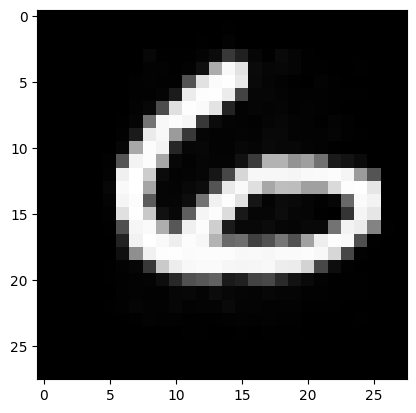

Train Epoch: [54/100], Loss: 0.0045
Train Epoch: [54/100], Loss: 0.0046
Train Epoch: [54/100], Loss: 0.0044
Train Epoch: [54/100], Loss: 0.0045
Train Epoch: [54/100], Loss: 0.0046
Train Epoch: [54/100], Loss: 0.0044
Train Epoch: [54/100], Loss: 0.0045
Train Epoch: [54/100], Loss: 0.0047
Train Epoch: [54/100], Loss: 0.0045
Train Epoch: [54/100], Loss: 0.0044
Train Epoch: [54/100], Loss: 0.0045
Train Epoch: [54/100], Loss: 0.0047
Train Epoch: [54/100], Loss: 0.0045
Train Epoch: [54/100], Loss: 0.0046
Train Epoch: [54/100], Loss: 0.0045
Train Epoch: [54/100], Loss: 0.0046
Train Epoch: [54/100], Loss: 0.0045
Train Epoch: [54/100], Loss: 0.0046
Train Epoch: [54/100], Loss: 0.0047
Train Epoch: [54/100], Loss: 0.0047
Train Epoch: [54/100], Loss: 0.0050
Train Epoch: [54/100], Loss: 0.0049
Train Epoch: [54/100], Loss: 0.0049
Train Epoch: [54/100], Loss: 0.0051
Train Epoch: [54/100], Loss: 0.0048
Train Epoch: [54/100], Loss: 0.0047
Train Epoch: [54/100], Loss: 0.0048
Train Epoch: [54/100], Loss:

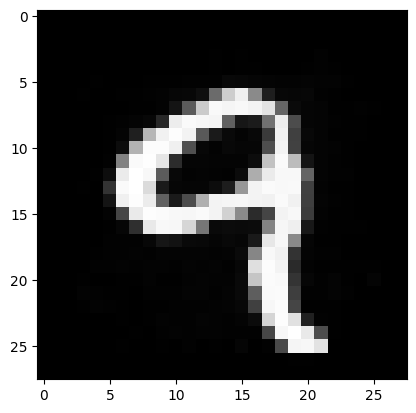

Train Epoch: [55/100], Loss: 0.0044
Train Epoch: [55/100], Loss: 0.0044
Train Epoch: [55/100], Loss: 0.0045
Train Epoch: [55/100], Loss: 0.0045
Train Epoch: [55/100], Loss: 0.0045
Train Epoch: [55/100], Loss: 0.0044
Train Epoch: [55/100], Loss: 0.0047
Train Epoch: [55/100], Loss: 0.0047
Train Epoch: [55/100], Loss: 0.0052
Train Epoch: [55/100], Loss: 0.0053
Train Epoch: [55/100], Loss: 0.0064
Train Epoch: [55/100], Loss: 0.0069
Train Epoch: [55/100], Loss: 0.0080
Train Epoch: [55/100], Loss: 0.0080
Train Epoch: [55/100], Loss: 0.0078
Train Epoch: [55/100], Loss: 0.0068
Train Epoch: [55/100], Loss: 0.0065
Train Epoch: [55/100], Loss: 0.0056
Train Epoch: [55/100], Loss: 0.0057
Train Epoch: [55/100], Loss: 0.0060
Train Epoch: [55/100], Loss: 0.0054
Train Epoch: [55/100], Loss: 0.0056
Train Epoch: [55/100], Loss: 0.0053
Train Epoch: [55/100], Loss: 0.0052
Train Epoch: [55/100], Loss: 0.0052
Train Epoch: [55/100], Loss: 0.0052
Train Epoch: [55/100], Loss: 0.0052
Train Epoch: [55/100], Loss:

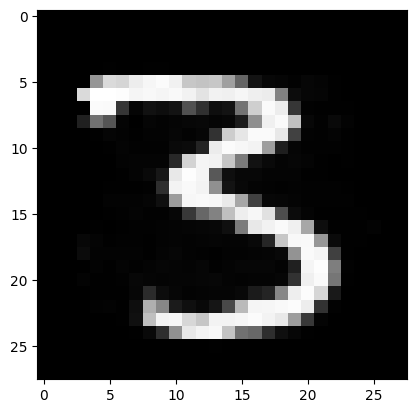

Train Epoch: [56/100], Loss: 0.0045
Train Epoch: [56/100], Loss: 0.0047
Train Epoch: [56/100], Loss: 0.0046
Train Epoch: [56/100], Loss: 0.0046
Train Epoch: [56/100], Loss: 0.0046
Train Epoch: [56/100], Loss: 0.0045
Train Epoch: [56/100], Loss: 0.0046
Train Epoch: [56/100], Loss: 0.0044
Train Epoch: [56/100], Loss: 0.0045
Train Epoch: [56/100], Loss: 0.0045
Train Epoch: [56/100], Loss: 0.0044
Train Epoch: [56/100], Loss: 0.0044
Train Epoch: [56/100], Loss: 0.0047
Train Epoch: [56/100], Loss: 0.0046
Train Epoch: [56/100], Loss: 0.0046
Train Epoch: [56/100], Loss: 0.0046
Train Epoch: [56/100], Loss: 0.0045
Train Epoch: [56/100], Loss: 0.0045
Train Epoch: [56/100], Loss: 0.0047
Train Epoch: [56/100], Loss: 0.0046
Train Epoch: [56/100], Loss: 0.0045
Train Epoch: [56/100], Loss: 0.0046
Train Epoch: [56/100], Loss: 0.0046
Train Epoch: [56/100], Loss: 0.0046
Train Epoch: [56/100], Loss: 0.0046
Train Epoch: [56/100], Loss: 0.0047
Train Epoch: [56/100], Loss: 0.0047
Train Epoch: [56/100], Loss:

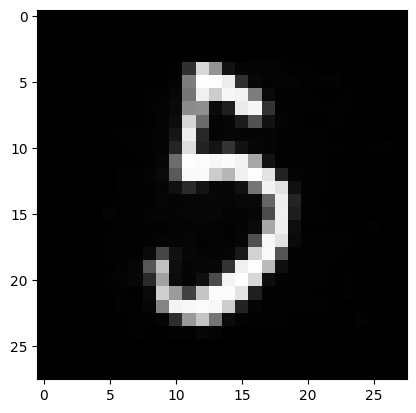

Train Epoch: [57/100], Loss: 0.0049
Train Epoch: [57/100], Loss: 0.0047
Train Epoch: [57/100], Loss: 0.0047
Train Epoch: [57/100], Loss: 0.0047
Train Epoch: [57/100], Loss: 0.0045
Train Epoch: [57/100], Loss: 0.0046
Train Epoch: [57/100], Loss: 0.0046
Train Epoch: [57/100], Loss: 0.0044
Train Epoch: [57/100], Loss: 0.0045
Train Epoch: [57/100], Loss: 0.0045
Train Epoch: [57/100], Loss: 0.0043
Train Epoch: [57/100], Loss: 0.0044
Train Epoch: [57/100], Loss: 0.0043
Train Epoch: [57/100], Loss: 0.0045
Train Epoch: [57/100], Loss: 0.0046
Train Epoch: [57/100], Loss: 0.0047
Train Epoch: [57/100], Loss: 0.0045
Train Epoch: [57/100], Loss: 0.0043
Train Epoch: [57/100], Loss: 0.0045
Train Epoch: [57/100], Loss: 0.0046
Train Epoch: [57/100], Loss: 0.0045
Train Epoch: [57/100], Loss: 0.0046
Train Epoch: [57/100], Loss: 0.0046
Train Epoch: [57/100], Loss: 0.0045
Train Epoch: [57/100], Loss: 0.0043
Train Epoch: [57/100], Loss: 0.0044
Train Epoch: [57/100], Loss: 0.0045
Train Epoch: [57/100], Loss:

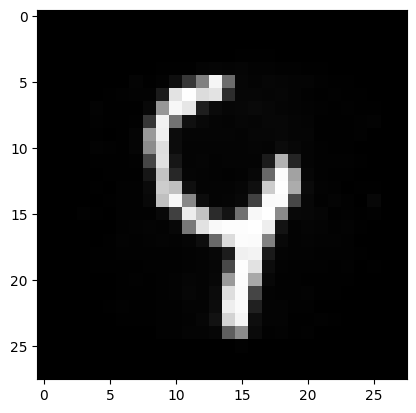

Train Epoch: [58/100], Loss: 0.0044
Train Epoch: [58/100], Loss: 0.0045
Train Epoch: [58/100], Loss: 0.0046
Train Epoch: [58/100], Loss: 0.0046
Train Epoch: [58/100], Loss: 0.0048
Train Epoch: [58/100], Loss: 0.0049
Train Epoch: [58/100], Loss: 0.0047
Train Epoch: [58/100], Loss: 0.0046
Train Epoch: [58/100], Loss: 0.0046
Train Epoch: [58/100], Loss: 0.0047
Train Epoch: [58/100], Loss: 0.0045
Train Epoch: [58/100], Loss: 0.0046
Train Epoch: [58/100], Loss: 0.0048
Train Epoch: [58/100], Loss: 0.0047
Train Epoch: [58/100], Loss: 0.0047
Train Epoch: [58/100], Loss: 0.0049
Train Epoch: [58/100], Loss: 0.0047
Train Epoch: [58/100], Loss: 0.0046
Train Epoch: [58/100], Loss: 0.0043
Train Epoch: [58/100], Loss: 0.0044
Train Epoch: [58/100], Loss: 0.0044
Train Epoch: [58/100], Loss: 0.0046
Train Epoch: [58/100], Loss: 0.0045
Train Epoch: [58/100], Loss: 0.0046
Train Epoch: [58/100], Loss: 0.0044
Train Epoch: [58/100], Loss: 0.0044
Train Epoch: [58/100], Loss: 0.0045
Train Epoch: [58/100], Loss:

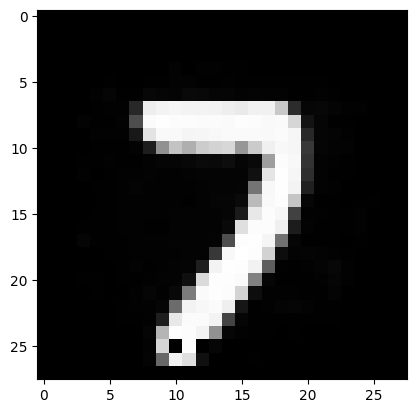

Train Epoch: [59/100], Loss: 0.0050
Train Epoch: [59/100], Loss: 0.0049
Train Epoch: [59/100], Loss: 0.0050
Train Epoch: [59/100], Loss: 0.0047
Train Epoch: [59/100], Loss: 0.0048
Train Epoch: [59/100], Loss: 0.0048
Train Epoch: [59/100], Loss: 0.0046
Train Epoch: [59/100], Loss: 0.0047
Train Epoch: [59/100], Loss: 0.0045
Train Epoch: [59/100], Loss: 0.0046
Train Epoch: [59/100], Loss: 0.0046
Train Epoch: [59/100], Loss: 0.0045
Train Epoch: [59/100], Loss: 0.0044
Train Epoch: [59/100], Loss: 0.0044
Train Epoch: [59/100], Loss: 0.0045
Train Epoch: [59/100], Loss: 0.0044
Train Epoch: [59/100], Loss: 0.0044
Train Epoch: [59/100], Loss: 0.0045
Train Epoch: [59/100], Loss: 0.0045
Train Epoch: [59/100], Loss: 0.0045
Train Epoch: [59/100], Loss: 0.0044
Train Epoch: [59/100], Loss: 0.0044
Train Epoch: [59/100], Loss: 0.0044
Train Epoch: [59/100], Loss: 0.0044
Train Epoch: [59/100], Loss: 0.0045
Train Epoch: [59/100], Loss: 0.0045
Train Epoch: [59/100], Loss: 0.0044
Train Epoch: [59/100], Loss:

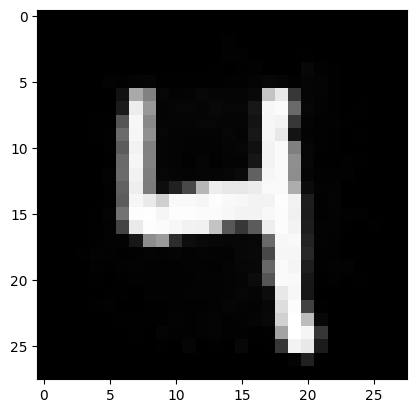

Train Epoch: [60/100], Loss: 0.0045
Train Epoch: [60/100], Loss: 0.0043
Train Epoch: [60/100], Loss: 0.0042
Train Epoch: [60/100], Loss: 0.0045
Train Epoch: [60/100], Loss: 0.0044
Train Epoch: [60/100], Loss: 0.0044
Train Epoch: [60/100], Loss: 0.0044
Train Epoch: [60/100], Loss: 0.0042
Train Epoch: [60/100], Loss: 0.0047
Train Epoch: [60/100], Loss: 0.0045
Train Epoch: [60/100], Loss: 0.0044
Train Epoch: [60/100], Loss: 0.0045
Train Epoch: [60/100], Loss: 0.0045
Train Epoch: [60/100], Loss: 0.0044
Train Epoch: [60/100], Loss: 0.0043
Train Epoch: [60/100], Loss: 0.0045
Train Epoch: [60/100], Loss: 0.0045
Train Epoch: [60/100], Loss: 0.0044
Train Epoch: [60/100], Loss: 0.0046
Train Epoch: [60/100], Loss: 0.0046
Train Epoch: [60/100], Loss: 0.0045
Train Epoch: [60/100], Loss: 0.0049
Train Epoch: [60/100], Loss: 0.0046
Train Epoch: [60/100], Loss: 0.0050
Train Epoch: [60/100], Loss: 0.0049
Train Epoch: [60/100], Loss: 0.0048
Train Epoch: [60/100], Loss: 0.0049
Train Epoch: [60/100], Loss:

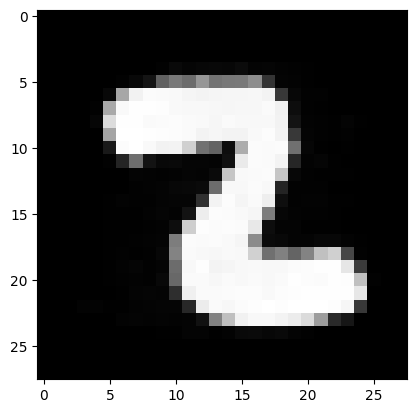

Train Epoch: [61/100], Loss: 0.0043
Train Epoch: [61/100], Loss: 0.0045
Train Epoch: [61/100], Loss: 0.0045
Train Epoch: [61/100], Loss: 0.0046
Train Epoch: [61/100], Loss: 0.0047
Train Epoch: [61/100], Loss: 0.0048
Train Epoch: [61/100], Loss: 0.0045
Train Epoch: [61/100], Loss: 0.0046
Train Epoch: [61/100], Loss: 0.0045
Train Epoch: [61/100], Loss: 0.0045
Train Epoch: [61/100], Loss: 0.0045
Train Epoch: [61/100], Loss: 0.0043
Train Epoch: [61/100], Loss: 0.0046
Train Epoch: [61/100], Loss: 0.0044
Train Epoch: [61/100], Loss: 0.0044
Train Epoch: [61/100], Loss: 0.0045
Train Epoch: [61/100], Loss: 0.0045
Train Epoch: [61/100], Loss: 0.0046
Train Epoch: [61/100], Loss: 0.0044
Train Epoch: [61/100], Loss: 0.0043
Train Epoch: [61/100], Loss: 0.0043
Train Epoch: [61/100], Loss: 0.0045
Train Epoch: [61/100], Loss: 0.0046
Train Epoch: [61/100], Loss: 0.0042
Train Epoch: [61/100], Loss: 0.0043
Train Epoch: [61/100], Loss: 0.0044
Train Epoch: [61/100], Loss: 0.0043
Train Epoch: [61/100], Loss:

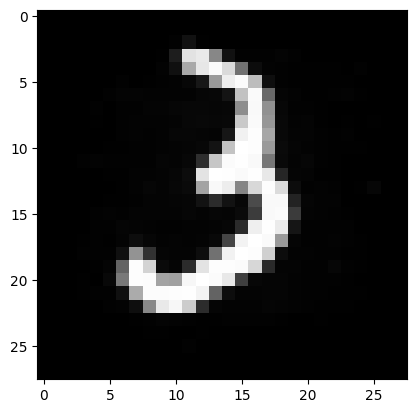

Train Epoch: [62/100], Loss: 0.0043
Train Epoch: [62/100], Loss: 0.0043
Train Epoch: [62/100], Loss: 0.0045
Train Epoch: [62/100], Loss: 0.0044
Train Epoch: [62/100], Loss: 0.0045
Train Epoch: [62/100], Loss: 0.0043
Train Epoch: [62/100], Loss: 0.0046
Train Epoch: [62/100], Loss: 0.0043
Train Epoch: [62/100], Loss: 0.0044
Train Epoch: [62/100], Loss: 0.0046
Train Epoch: [62/100], Loss: 0.0045
Train Epoch: [62/100], Loss: 0.0045
Train Epoch: [62/100], Loss: 0.0047
Train Epoch: [62/100], Loss: 0.0051
Train Epoch: [62/100], Loss: 0.0051
Train Epoch: [62/100], Loss: 0.0051
Train Epoch: [62/100], Loss: 0.0051
Train Epoch: [62/100], Loss: 0.0050
Train Epoch: [62/100], Loss: 0.0050
Train Epoch: [62/100], Loss: 0.0051
Train Epoch: [62/100], Loss: 0.0046
Train Epoch: [62/100], Loss: 0.0044
Train Epoch: [62/100], Loss: 0.0044
Train Epoch: [62/100], Loss: 0.0043
Train Epoch: [62/100], Loss: 0.0045
Train Epoch: [62/100], Loss: 0.0045
Train Epoch: [62/100], Loss: 0.0045
Train Epoch: [62/100], Loss:

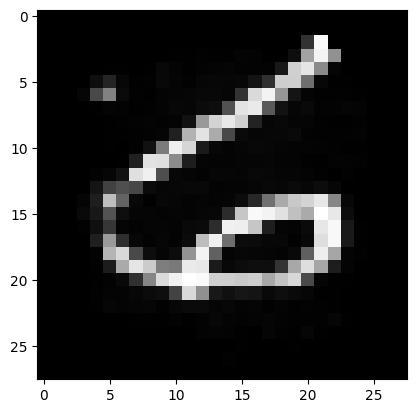

Train Epoch: [63/100], Loss: 0.0049
Train Epoch: [63/100], Loss: 0.0047
Train Epoch: [63/100], Loss: 0.0045
Train Epoch: [63/100], Loss: 0.0046
Train Epoch: [63/100], Loss: 0.0047
Train Epoch: [63/100], Loss: 0.0048
Train Epoch: [63/100], Loss: 0.0048
Train Epoch: [63/100], Loss: 0.0048
Train Epoch: [63/100], Loss: 0.0044
Train Epoch: [63/100], Loss: 0.0042
Train Epoch: [63/100], Loss: 0.0044
Train Epoch: [63/100], Loss: 0.0045
Train Epoch: [63/100], Loss: 0.0045
Train Epoch: [63/100], Loss: 0.0045
Train Epoch: [63/100], Loss: 0.0043
Train Epoch: [63/100], Loss: 0.0046
Train Epoch: [63/100], Loss: 0.0044
Train Epoch: [63/100], Loss: 0.0045
Train Epoch: [63/100], Loss: 0.0044
Train Epoch: [63/100], Loss: 0.0044
Train Epoch: [63/100], Loss: 0.0043
Train Epoch: [63/100], Loss: 0.0044
Train Epoch: [63/100], Loss: 0.0043
Train Epoch: [63/100], Loss: 0.0046
Train Epoch: [63/100], Loss: 0.0045
Train Epoch: [63/100], Loss: 0.0044
Train Epoch: [63/100], Loss: 0.0045
Train Epoch: [63/100], Loss:

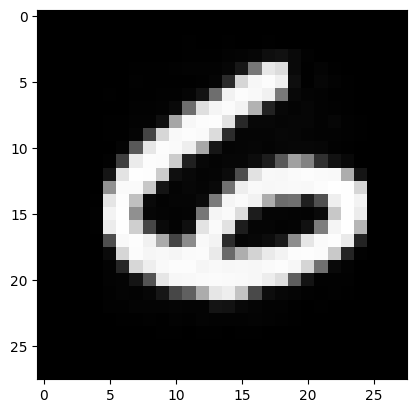

Train Epoch: [64/100], Loss: 0.0043
Train Epoch: [64/100], Loss: 0.0041
Train Epoch: [64/100], Loss: 0.0044
Train Epoch: [64/100], Loss: 0.0043
Train Epoch: [64/100], Loss: 0.0044
Train Epoch: [64/100], Loss: 0.0042
Train Epoch: [64/100], Loss: 0.0045
Train Epoch: [64/100], Loss: 0.0047
Train Epoch: [64/100], Loss: 0.0044
Train Epoch: [64/100], Loss: 0.0045
Train Epoch: [64/100], Loss: 0.0043
Train Epoch: [64/100], Loss: 0.0045
Train Epoch: [64/100], Loss: 0.0045
Train Epoch: [64/100], Loss: 0.0045
Train Epoch: [64/100], Loss: 0.0045
Train Epoch: [64/100], Loss: 0.0049
Train Epoch: [64/100], Loss: 0.0051
Train Epoch: [64/100], Loss: 0.0052
Train Epoch: [64/100], Loss: 0.0051
Train Epoch: [64/100], Loss: 0.0052
Train Epoch: [64/100], Loss: 0.0053
Train Epoch: [64/100], Loss: 0.0051
Train Epoch: [64/100], Loss: 0.0048
Train Epoch: [64/100], Loss: 0.0046
Train Epoch: [64/100], Loss: 0.0045
Train Epoch: [64/100], Loss: 0.0047
Train Epoch: [64/100], Loss: 0.0047
Train Epoch: [64/100], Loss:

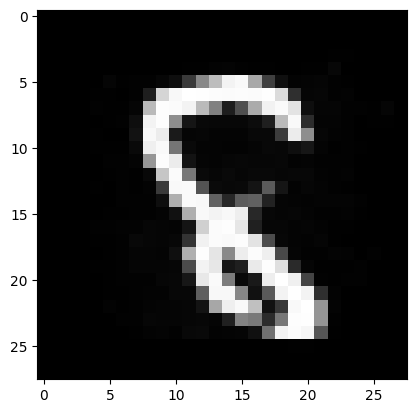

Train Epoch: [65/100], Loss: 0.0046
Train Epoch: [65/100], Loss: 0.0044
Train Epoch: [65/100], Loss: 0.0044
Train Epoch: [65/100], Loss: 0.0046
Train Epoch: [65/100], Loss: 0.0045
Train Epoch: [65/100], Loss: 0.0045
Train Epoch: [65/100], Loss: 0.0044
Train Epoch: [65/100], Loss: 0.0043
Train Epoch: [65/100], Loss: 0.0042
Train Epoch: [65/100], Loss: 0.0042
Train Epoch: [65/100], Loss: 0.0042
Train Epoch: [65/100], Loss: 0.0046
Train Epoch: [65/100], Loss: 0.0045
Train Epoch: [65/100], Loss: 0.0043
Train Epoch: [65/100], Loss: 0.0045
Train Epoch: [65/100], Loss: 0.0044
Train Epoch: [65/100], Loss: 0.0043
Train Epoch: [65/100], Loss: 0.0044
Train Epoch: [65/100], Loss: 0.0043
Train Epoch: [65/100], Loss: 0.0044
Train Epoch: [65/100], Loss: 0.0044
Train Epoch: [65/100], Loss: 0.0045
Train Epoch: [65/100], Loss: 0.0045
Train Epoch: [65/100], Loss: 0.0045
Train Epoch: [65/100], Loss: 0.0042
Train Epoch: [65/100], Loss: 0.0042
Train Epoch: [65/100], Loss: 0.0045
Train Epoch: [65/100], Loss:

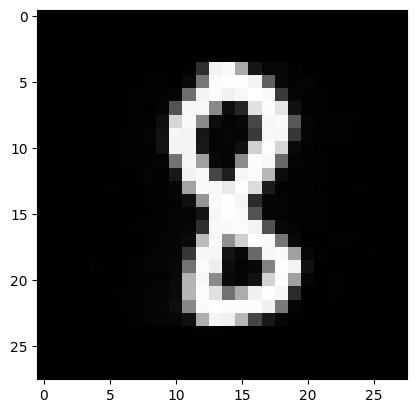

Train Epoch: [66/100], Loss: 0.0046
Train Epoch: [66/100], Loss: 0.0042
Train Epoch: [66/100], Loss: 0.0043
Train Epoch: [66/100], Loss: 0.0045
Train Epoch: [66/100], Loss: 0.0045
Train Epoch: [66/100], Loss: 0.0044
Train Epoch: [66/100], Loss: 0.0042
Train Epoch: [66/100], Loss: 0.0045
Train Epoch: [66/100], Loss: 0.0043
Train Epoch: [66/100], Loss: 0.0042
Train Epoch: [66/100], Loss: 0.0042
Train Epoch: [66/100], Loss: 0.0043
Train Epoch: [66/100], Loss: 0.0042
Train Epoch: [66/100], Loss: 0.0041
Train Epoch: [66/100], Loss: 0.0042
Train Epoch: [66/100], Loss: 0.0042
Train Epoch: [66/100], Loss: 0.0045
Train Epoch: [66/100], Loss: 0.0045
Train Epoch: [66/100], Loss: 0.0044
Train Epoch: [66/100], Loss: 0.0043
Train Epoch: [66/100], Loss: 0.0043
Train Epoch: [66/100], Loss: 0.0045
Train Epoch: [66/100], Loss: 0.0046
Train Epoch: [66/100], Loss: 0.0044
Train Epoch: [66/100], Loss: 0.0045
Train Epoch: [66/100], Loss: 0.0044
Train Epoch: [66/100], Loss: 0.0046
Train Epoch: [66/100], Loss:

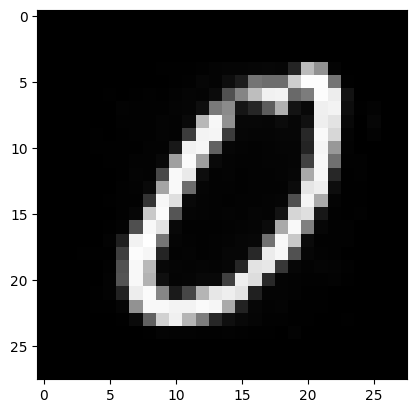

Train Epoch: [67/100], Loss: 0.0044
Train Epoch: [67/100], Loss: 0.0044
Train Epoch: [67/100], Loss: 0.0045
Train Epoch: [67/100], Loss: 0.0047
Train Epoch: [67/100], Loss: 0.0048
Train Epoch: [67/100], Loss: 0.0049
Train Epoch: [67/100], Loss: 0.0048
Train Epoch: [67/100], Loss: 0.0047
Train Epoch: [67/100], Loss: 0.0047
Train Epoch: [67/100], Loss: 0.0048
Train Epoch: [67/100], Loss: 0.0049
Train Epoch: [67/100], Loss: 0.0049
Train Epoch: [67/100], Loss: 0.0048
Train Epoch: [67/100], Loss: 0.0045
Train Epoch: [67/100], Loss: 0.0044
Train Epoch: [67/100], Loss: 0.0043
Train Epoch: [67/100], Loss: 0.0045
Train Epoch: [67/100], Loss: 0.0045
Train Epoch: [67/100], Loss: 0.0046
Train Epoch: [67/100], Loss: 0.0042
Train Epoch: [67/100], Loss: 0.0045
Train Epoch: [67/100], Loss: 0.0043
Train Epoch: [67/100], Loss: 0.0044
Train Epoch: [67/100], Loss: 0.0042
Train Epoch: [67/100], Loss: 0.0043
Train Epoch: [67/100], Loss: 0.0043
Train Epoch: [67/100], Loss: 0.0044
Train Epoch: [67/100], Loss:

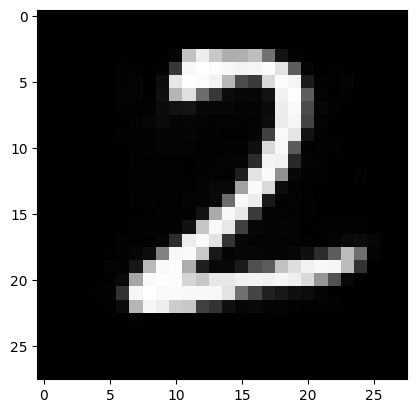

Train Epoch: [68/100], Loss: 0.0043
Train Epoch: [68/100], Loss: 0.0044
Train Epoch: [68/100], Loss: 0.0042
Train Epoch: [68/100], Loss: 0.0043
Train Epoch: [68/100], Loss: 0.0041
Train Epoch: [68/100], Loss: 0.0042
Train Epoch: [68/100], Loss: 0.0041
Train Epoch: [68/100], Loss: 0.0043
Train Epoch: [68/100], Loss: 0.0044
Train Epoch: [68/100], Loss: 0.0045
Train Epoch: [68/100], Loss: 0.0042
Train Epoch: [68/100], Loss: 0.0044
Train Epoch: [68/100], Loss: 0.0042
Train Epoch: [68/100], Loss: 0.0041
Train Epoch: [68/100], Loss: 0.0044
Train Epoch: [68/100], Loss: 0.0043
Train Epoch: [68/100], Loss: 0.0043
Train Epoch: [68/100], Loss: 0.0043
Train Epoch: [68/100], Loss: 0.0045
Train Epoch: [68/100], Loss: 0.0044
Train Epoch: [68/100], Loss: 0.0043
Train Epoch: [68/100], Loss: 0.0044
Train Epoch: [68/100], Loss: 0.0042
Train Epoch: [68/100], Loss: 0.0041
Train Epoch: [68/100], Loss: 0.0043
Train Epoch: [68/100], Loss: 0.0041
Train Epoch: [68/100], Loss: 0.0044
Train Epoch: [68/100], Loss:

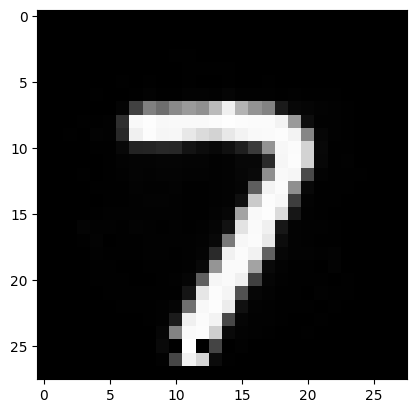

Train Epoch: [69/100], Loss: 0.0043
Train Epoch: [69/100], Loss: 0.0043
Train Epoch: [69/100], Loss: 0.0044
Train Epoch: [69/100], Loss: 0.0045
Train Epoch: [69/100], Loss: 0.0045
Train Epoch: [69/100], Loss: 0.0046
Train Epoch: [69/100], Loss: 0.0045
Train Epoch: [69/100], Loss: 0.0043
Train Epoch: [69/100], Loss: 0.0043
Train Epoch: [69/100], Loss: 0.0043
Train Epoch: [69/100], Loss: 0.0045
Train Epoch: [69/100], Loss: 0.0043
Train Epoch: [69/100], Loss: 0.0042
Train Epoch: [69/100], Loss: 0.0044
Train Epoch: [69/100], Loss: 0.0041
Train Epoch: [69/100], Loss: 0.0044
Train Epoch: [69/100], Loss: 0.0043
Train Epoch: [69/100], Loss: 0.0046
Train Epoch: [69/100], Loss: 0.0042
Train Epoch: [69/100], Loss: 0.0043
Train Epoch: [69/100], Loss: 0.0043
Train Epoch: [69/100], Loss: 0.0043
Train Epoch: [69/100], Loss: 0.0043
Train Epoch: [69/100], Loss: 0.0043
Train Epoch: [69/100], Loss: 0.0042
Train Epoch: [69/100], Loss: 0.0044
Train Epoch: [69/100], Loss: 0.0045
Train Epoch: [69/100], Loss:

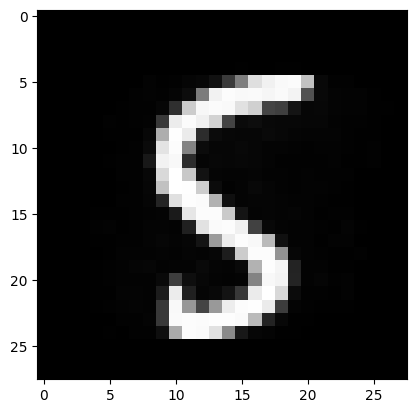

Train Epoch: [70/100], Loss: 0.0045
Train Epoch: [70/100], Loss: 0.0045
Train Epoch: [70/100], Loss: 0.0045
Train Epoch: [70/100], Loss: 0.0049
Train Epoch: [70/100], Loss: 0.0050
Train Epoch: [70/100], Loss: 0.0049
Train Epoch: [70/100], Loss: 0.0049
Train Epoch: [70/100], Loss: 0.0046
Train Epoch: [70/100], Loss: 0.0046
Train Epoch: [70/100], Loss: 0.0044
Train Epoch: [70/100], Loss: 0.0046
Train Epoch: [70/100], Loss: 0.0046
Train Epoch: [70/100], Loss: 0.0046
Train Epoch: [70/100], Loss: 0.0043
Train Epoch: [70/100], Loss: 0.0044
Train Epoch: [70/100], Loss: 0.0043
Train Epoch: [70/100], Loss: 0.0044
Train Epoch: [70/100], Loss: 0.0044
Train Epoch: [70/100], Loss: 0.0044
Train Epoch: [70/100], Loss: 0.0044
Train Epoch: [70/100], Loss: 0.0043
Train Epoch: [70/100], Loss: 0.0043
Train Epoch: [70/100], Loss: 0.0045
Train Epoch: [70/100], Loss: 0.0043
Train Epoch: [70/100], Loss: 0.0043
Train Epoch: [70/100], Loss: 0.0044
Train Epoch: [70/100], Loss: 0.0042
Train Epoch: [70/100], Loss:

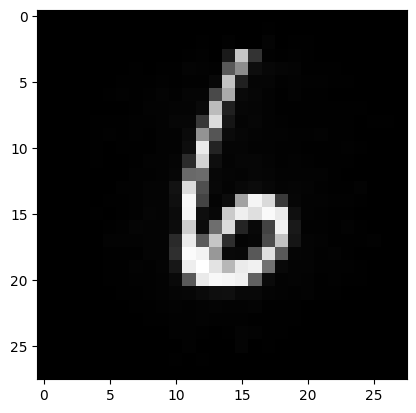

Train Epoch: [71/100], Loss: 0.0043
Train Epoch: [71/100], Loss: 0.0042
Train Epoch: [71/100], Loss: 0.0043
Train Epoch: [71/100], Loss: 0.0043
Train Epoch: [71/100], Loss: 0.0044
Train Epoch: [71/100], Loss: 0.0044
Train Epoch: [71/100], Loss: 0.0043
Train Epoch: [71/100], Loss: 0.0044
Train Epoch: [71/100], Loss: 0.0043
Train Epoch: [71/100], Loss: 0.0044
Train Epoch: [71/100], Loss: 0.0042
Train Epoch: [71/100], Loss: 0.0044
Train Epoch: [71/100], Loss: 0.0042
Train Epoch: [71/100], Loss: 0.0044
Train Epoch: [71/100], Loss: 0.0044
Train Epoch: [71/100], Loss: 0.0043
Train Epoch: [71/100], Loss: 0.0043
Train Epoch: [71/100], Loss: 0.0044
Train Epoch: [71/100], Loss: 0.0044
Train Epoch: [71/100], Loss: 0.0044
Train Epoch: [71/100], Loss: 0.0045
Train Epoch: [71/100], Loss: 0.0044
Train Epoch: [71/100], Loss: 0.0043
Train Epoch: [71/100], Loss: 0.0045
Train Epoch: [71/100], Loss: 0.0044
Train Epoch: [71/100], Loss: 0.0044
Train Epoch: [71/100], Loss: 0.0044
Train Epoch: [71/100], Loss:

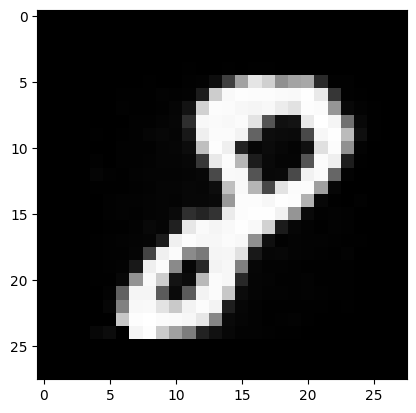

Train Epoch: [72/100], Loss: 0.0044
Train Epoch: [72/100], Loss: 0.0043
Train Epoch: [72/100], Loss: 0.0044
Train Epoch: [72/100], Loss: 0.0044
Train Epoch: [72/100], Loss: 0.0045
Train Epoch: [72/100], Loss: 0.0047
Train Epoch: [72/100], Loss: 0.0046
Train Epoch: [72/100], Loss: 0.0047
Train Epoch: [72/100], Loss: 0.0046
Train Epoch: [72/100], Loss: 0.0045
Train Epoch: [72/100], Loss: 0.0044
Train Epoch: [72/100], Loss: 0.0042
Train Epoch: [72/100], Loss: 0.0045
Train Epoch: [72/100], Loss: 0.0044
Train Epoch: [72/100], Loss: 0.0045
Train Epoch: [72/100], Loss: 0.0043
Train Epoch: [72/100], Loss: 0.0042
Train Epoch: [72/100], Loss: 0.0043
Train Epoch: [72/100], Loss: 0.0044
Train Epoch: [72/100], Loss: 0.0042
Train Epoch: [72/100], Loss: 0.0043
Train Epoch: [72/100], Loss: 0.0043
Train Epoch: [72/100], Loss: 0.0042
Train Epoch: [72/100], Loss: 0.0043
Train Epoch: [72/100], Loss: 0.0040
Train Epoch: [72/100], Loss: 0.0043
Train Epoch: [72/100], Loss: 0.0041
Train Epoch: [72/100], Loss:

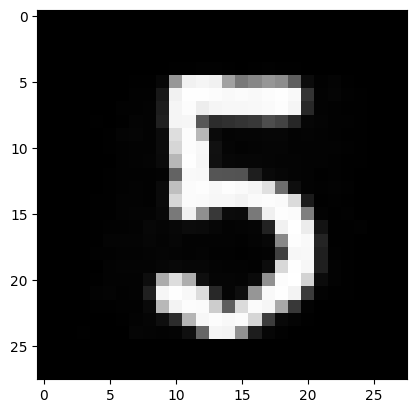

Train Epoch: [73/100], Loss: 0.0044
Train Epoch: [73/100], Loss: 0.0044
Train Epoch: [73/100], Loss: 0.0044
Train Epoch: [73/100], Loss: 0.0041
Train Epoch: [73/100], Loss: 0.0041
Train Epoch: [73/100], Loss: 0.0043
Train Epoch: [73/100], Loss: 0.0043
Train Epoch: [73/100], Loss: 0.0042
Train Epoch: [73/100], Loss: 0.0044
Train Epoch: [73/100], Loss: 0.0044
Train Epoch: [73/100], Loss: 0.0044
Train Epoch: [73/100], Loss: 0.0043
Train Epoch: [73/100], Loss: 0.0043
Train Epoch: [73/100], Loss: 0.0045
Train Epoch: [73/100], Loss: 0.0048
Train Epoch: [73/100], Loss: 0.0047
Train Epoch: [73/100], Loss: 0.0048
Train Epoch: [73/100], Loss: 0.0049
Train Epoch: [73/100], Loss: 0.0047
Train Epoch: [73/100], Loss: 0.0048
Train Epoch: [73/100], Loss: 0.0046
Train Epoch: [73/100], Loss: 0.0045
Train Epoch: [73/100], Loss: 0.0045
Train Epoch: [73/100], Loss: 0.0043
Train Epoch: [73/100], Loss: 0.0044
Train Epoch: [73/100], Loss: 0.0043
Train Epoch: [73/100], Loss: 0.0045
Train Epoch: [73/100], Loss:

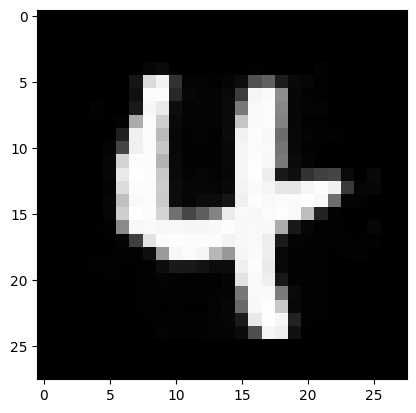

Train Epoch: [74/100], Loss: 0.0043
Train Epoch: [74/100], Loss: 0.0042
Train Epoch: [74/100], Loss: 0.0043
Train Epoch: [74/100], Loss: 0.0046
Train Epoch: [74/100], Loss: 0.0046
Train Epoch: [74/100], Loss: 0.0042
Train Epoch: [74/100], Loss: 0.0043
Train Epoch: [74/100], Loss: 0.0044
Train Epoch: [74/100], Loss: 0.0043
Train Epoch: [74/100], Loss: 0.0043
Train Epoch: [74/100], Loss: 0.0044
Train Epoch: [74/100], Loss: 0.0042
Train Epoch: [74/100], Loss: 0.0044
Train Epoch: [74/100], Loss: 0.0046
Train Epoch: [74/100], Loss: 0.0045
Train Epoch: [74/100], Loss: 0.0044
Train Epoch: [74/100], Loss: 0.0046
Train Epoch: [74/100], Loss: 0.0044
Train Epoch: [74/100], Loss: 0.0041
Train Epoch: [74/100], Loss: 0.0040
Train Epoch: [74/100], Loss: 0.0043
Train Epoch: [74/100], Loss: 0.0043
Train Epoch: [74/100], Loss: 0.0043
Train Epoch: [74/100], Loss: 0.0042
Train Epoch: [74/100], Loss: 0.0045
Train Epoch: [74/100], Loss: 0.0043
Train Epoch: [74/100], Loss: 0.0042
Train Epoch: [74/100], Loss:

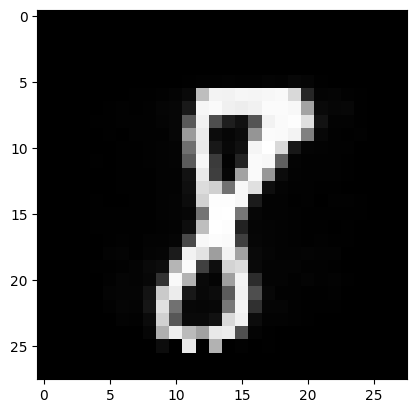

Train Epoch: [75/100], Loss: 0.0043
Train Epoch: [75/100], Loss: 0.0042
Train Epoch: [75/100], Loss: 0.0043
Train Epoch: [75/100], Loss: 0.0043
Train Epoch: [75/100], Loss: 0.0044
Train Epoch: [75/100], Loss: 0.0044
Train Epoch: [75/100], Loss: 0.0041
Train Epoch: [75/100], Loss: 0.0042
Train Epoch: [75/100], Loss: 0.0045
Train Epoch: [75/100], Loss: 0.0043
Train Epoch: [75/100], Loss: 0.0044
Train Epoch: [75/100], Loss: 0.0045
Train Epoch: [75/100], Loss: 0.0042
Train Epoch: [75/100], Loss: 0.0042
Train Epoch: [75/100], Loss: 0.0042
Train Epoch: [75/100], Loss: 0.0042
Train Epoch: [75/100], Loss: 0.0042
Train Epoch: [75/100], Loss: 0.0043
Train Epoch: [75/100], Loss: 0.0043
Train Epoch: [75/100], Loss: 0.0042
Train Epoch: [75/100], Loss: 0.0041
Train Epoch: [75/100], Loss: 0.0042
Train Epoch: [75/100], Loss: 0.0043
Train Epoch: [75/100], Loss: 0.0042
Train Epoch: [75/100], Loss: 0.0044
Train Epoch: [75/100], Loss: 0.0045
Train Epoch: [75/100], Loss: 0.0043
Train Epoch: [75/100], Loss:

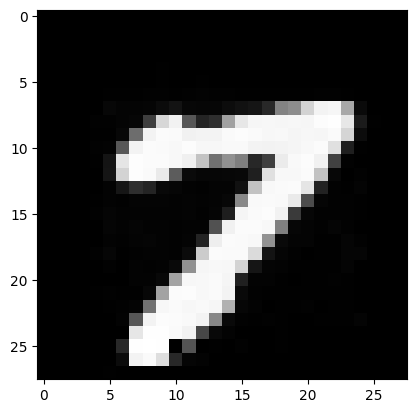

Train Epoch: [76/100], Loss: 0.0041
Train Epoch: [76/100], Loss: 0.0043
Train Epoch: [76/100], Loss: 0.0043
Train Epoch: [76/100], Loss: 0.0042
Train Epoch: [76/100], Loss: 0.0044
Train Epoch: [76/100], Loss: 0.0041
Train Epoch: [76/100], Loss: 0.0042
Train Epoch: [76/100], Loss: 0.0043
Train Epoch: [76/100], Loss: 0.0043
Train Epoch: [76/100], Loss: 0.0045
Train Epoch: [76/100], Loss: 0.0045
Train Epoch: [76/100], Loss: 0.0044
Train Epoch: [76/100], Loss: 0.0045
Train Epoch: [76/100], Loss: 0.0045
Train Epoch: [76/100], Loss: 0.0043
Train Epoch: [76/100], Loss: 0.0046
Train Epoch: [76/100], Loss: 0.0045
Train Epoch: [76/100], Loss: 0.0046
Train Epoch: [76/100], Loss: 0.0044
Train Epoch: [76/100], Loss: 0.0044
Train Epoch: [76/100], Loss: 0.0047
Train Epoch: [76/100], Loss: 0.0044
Train Epoch: [76/100], Loss: 0.0043
Train Epoch: [76/100], Loss: 0.0043
Train Epoch: [76/100], Loss: 0.0044
Train Epoch: [76/100], Loss: 0.0043
Train Epoch: [76/100], Loss: 0.0044
Train Epoch: [76/100], Loss:

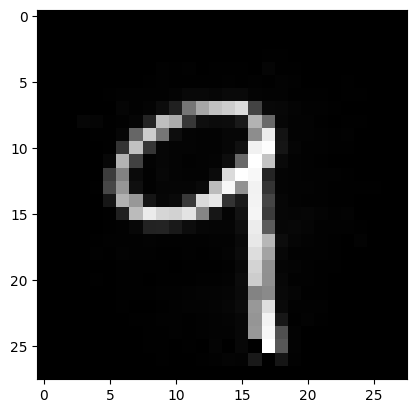

Train Epoch: [77/100], Loss: 0.0042
Train Epoch: [77/100], Loss: 0.0043
Train Epoch: [77/100], Loss: 0.0043
Train Epoch: [77/100], Loss: 0.0043
Train Epoch: [77/100], Loss: 0.0045
Train Epoch: [77/100], Loss: 0.0044
Train Epoch: [77/100], Loss: 0.0042
Train Epoch: [77/100], Loss: 0.0042
Train Epoch: [77/100], Loss: 0.0041
Train Epoch: [77/100], Loss: 0.0041
Train Epoch: [77/100], Loss: 0.0043
Train Epoch: [77/100], Loss: 0.0043
Train Epoch: [77/100], Loss: 0.0041
Train Epoch: [77/100], Loss: 0.0042
Train Epoch: [77/100], Loss: 0.0043
Train Epoch: [77/100], Loss: 0.0042
Train Epoch: [77/100], Loss: 0.0044
Train Epoch: [77/100], Loss: 0.0044
Train Epoch: [77/100], Loss: 0.0043
Train Epoch: [77/100], Loss: 0.0043
Train Epoch: [77/100], Loss: 0.0042
Train Epoch: [77/100], Loss: 0.0045
Train Epoch: [77/100], Loss: 0.0044
Train Epoch: [77/100], Loss: 0.0045
Train Epoch: [77/100], Loss: 0.0048
Train Epoch: [77/100], Loss: 0.0047
Train Epoch: [77/100], Loss: 0.0045
Train Epoch: [77/100], Loss:

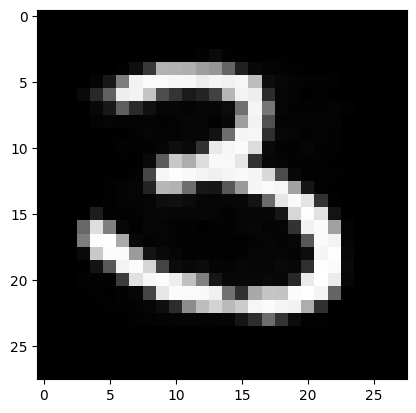

Train Epoch: [78/100], Loss: 0.0043
Train Epoch: [78/100], Loss: 0.0043
Train Epoch: [78/100], Loss: 0.0043
Train Epoch: [78/100], Loss: 0.0044
Train Epoch: [78/100], Loss: 0.0042
Train Epoch: [78/100], Loss: 0.0044
Train Epoch: [78/100], Loss: 0.0041
Train Epoch: [78/100], Loss: 0.0042
Train Epoch: [78/100], Loss: 0.0044
Train Epoch: [78/100], Loss: 0.0043
Train Epoch: [78/100], Loss: 0.0047
Train Epoch: [78/100], Loss: 0.0045
Train Epoch: [78/100], Loss: 0.0045
Train Epoch: [78/100], Loss: 0.0045
Train Epoch: [78/100], Loss: 0.0044
Train Epoch: [78/100], Loss: 0.0042
Train Epoch: [78/100], Loss: 0.0041
Train Epoch: [78/100], Loss: 0.0045
Train Epoch: [78/100], Loss: 0.0044
Train Epoch: [78/100], Loss: 0.0041
Train Epoch: [78/100], Loss: 0.0042
Train Epoch: [78/100], Loss: 0.0043
Train Epoch: [78/100], Loss: 0.0043
Train Epoch: [78/100], Loss: 0.0044
Train Epoch: [78/100], Loss: 0.0043
Train Epoch: [78/100], Loss: 0.0043
Train Epoch: [78/100], Loss: 0.0044
Train Epoch: [78/100], Loss:

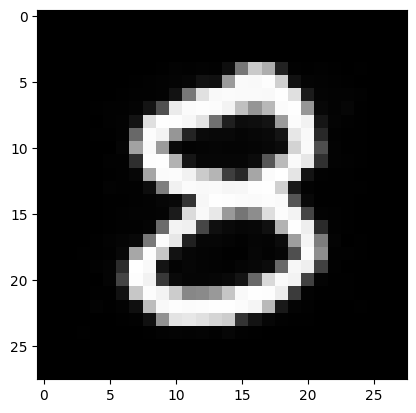

Train Epoch: [79/100], Loss: 0.0042
Train Epoch: [79/100], Loss: 0.0042
Train Epoch: [79/100], Loss: 0.0043
Train Epoch: [79/100], Loss: 0.0042
Train Epoch: [79/100], Loss: 0.0041
Train Epoch: [79/100], Loss: 0.0044
Train Epoch: [79/100], Loss: 0.0045
Train Epoch: [79/100], Loss: 0.0045
Train Epoch: [79/100], Loss: 0.0048
Train Epoch: [79/100], Loss: 0.0045
Train Epoch: [79/100], Loss: 0.0049
Train Epoch: [79/100], Loss: 0.0048
Train Epoch: [79/100], Loss: 0.0047
Train Epoch: [79/100], Loss: 0.0045
Train Epoch: [79/100], Loss: 0.0044
Train Epoch: [79/100], Loss: 0.0044
Train Epoch: [79/100], Loss: 0.0042
Train Epoch: [79/100], Loss: 0.0043
Train Epoch: [79/100], Loss: 0.0042
Train Epoch: [79/100], Loss: 0.0042
Train Epoch: [79/100], Loss: 0.0044
Train Epoch: [79/100], Loss: 0.0040
Train Epoch: [79/100], Loss: 0.0041
Train Epoch: [79/100], Loss: 0.0039
Train Epoch: [79/100], Loss: 0.0042
Train Epoch: [79/100], Loss: 0.0041
Train Epoch: [79/100], Loss: 0.0041
Train Epoch: [79/100], Loss:

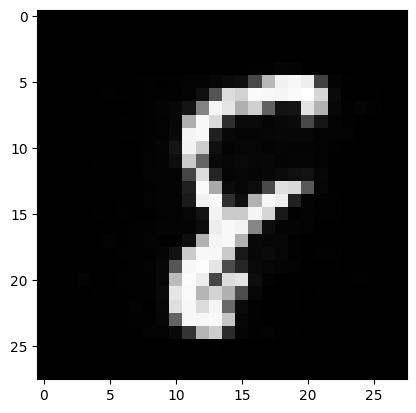

Train Epoch: [80/100], Loss: 0.0044
Train Epoch: [80/100], Loss: 0.0042
Train Epoch: [80/100], Loss: 0.0043
Train Epoch: [80/100], Loss: 0.0041
Train Epoch: [80/100], Loss: 0.0041
Train Epoch: [80/100], Loss: 0.0042
Train Epoch: [80/100], Loss: 0.0041
Train Epoch: [80/100], Loss: 0.0042
Train Epoch: [80/100], Loss: 0.0040
Train Epoch: [80/100], Loss: 0.0043
Train Epoch: [80/100], Loss: 0.0041
Train Epoch: [80/100], Loss: 0.0040
Train Epoch: [80/100], Loss: 0.0044
Train Epoch: [80/100], Loss: 0.0041
Train Epoch: [80/100], Loss: 0.0042
Train Epoch: [80/100], Loss: 0.0040
Train Epoch: [80/100], Loss: 0.0040
Train Epoch: [80/100], Loss: 0.0043
Train Epoch: [80/100], Loss: 0.0042
Train Epoch: [80/100], Loss: 0.0042
Train Epoch: [80/100], Loss: 0.0045
Train Epoch: [80/100], Loss: 0.0043
Train Epoch: [80/100], Loss: 0.0045
Train Epoch: [80/100], Loss: 0.0046
Train Epoch: [80/100], Loss: 0.0048
Train Epoch: [80/100], Loss: 0.0048
Train Epoch: [80/100], Loss: 0.0050
Train Epoch: [80/100], Loss:

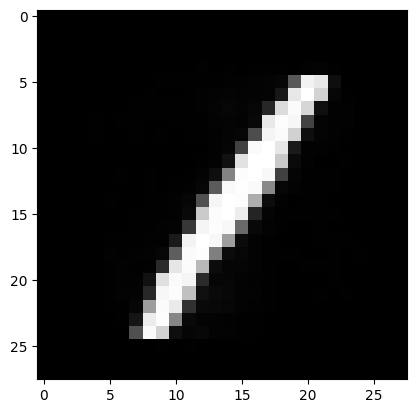

Train Epoch: [81/100], Loss: 0.0045
Train Epoch: [81/100], Loss: 0.0047
Train Epoch: [81/100], Loss: 0.0046
Train Epoch: [81/100], Loss: 0.0048
Train Epoch: [81/100], Loss: 0.0047
Train Epoch: [81/100], Loss: 0.0047
Train Epoch: [81/100], Loss: 0.0045
Train Epoch: [81/100], Loss: 0.0046
Train Epoch: [81/100], Loss: 0.0043
Train Epoch: [81/100], Loss: 0.0043
Train Epoch: [81/100], Loss: 0.0042
Train Epoch: [81/100], Loss: 0.0043
Train Epoch: [81/100], Loss: 0.0043
Train Epoch: [81/100], Loss: 0.0043
Train Epoch: [81/100], Loss: 0.0042
Train Epoch: [81/100], Loss: 0.0041
Train Epoch: [81/100], Loss: 0.0041
Train Epoch: [81/100], Loss: 0.0041
Train Epoch: [81/100], Loss: 0.0040
Train Epoch: [81/100], Loss: 0.0043
Train Epoch: [81/100], Loss: 0.0044
Train Epoch: [81/100], Loss: 0.0043
Train Epoch: [81/100], Loss: 0.0042
Train Epoch: [81/100], Loss: 0.0043
Train Epoch: [81/100], Loss: 0.0040
Train Epoch: [81/100], Loss: 0.0040
Train Epoch: [81/100], Loss: 0.0042
Train Epoch: [81/100], Loss:

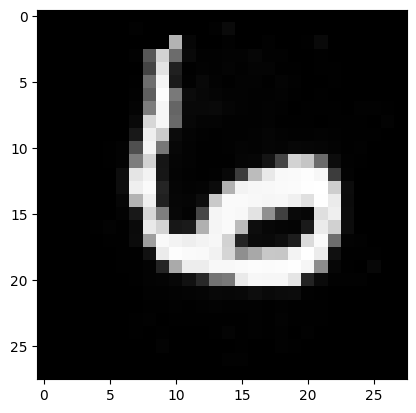

Train Epoch: [82/100], Loss: 0.0042
Train Epoch: [82/100], Loss: 0.0043
Train Epoch: [82/100], Loss: 0.0044
Train Epoch: [82/100], Loss: 0.0044
Train Epoch: [82/100], Loss: 0.0045
Train Epoch: [82/100], Loss: 0.0045
Train Epoch: [82/100], Loss: 0.0043
Train Epoch: [82/100], Loss: 0.0042
Train Epoch: [82/100], Loss: 0.0041
Train Epoch: [82/100], Loss: 0.0041
Train Epoch: [82/100], Loss: 0.0043
Train Epoch: [82/100], Loss: 0.0043
Train Epoch: [82/100], Loss: 0.0043
Train Epoch: [82/100], Loss: 0.0043
Train Epoch: [82/100], Loss: 0.0045
Train Epoch: [82/100], Loss: 0.0044
Train Epoch: [82/100], Loss: 0.0046
Train Epoch: [82/100], Loss: 0.0047
Train Epoch: [82/100], Loss: 0.0049
Train Epoch: [82/100], Loss: 0.0044
Train Epoch: [82/100], Loss: 0.0041
Train Epoch: [82/100], Loss: 0.0041
Train Epoch: [82/100], Loss: 0.0042
Train Epoch: [82/100], Loss: 0.0044
Train Epoch: [82/100], Loss: 0.0041
Train Epoch: [82/100], Loss: 0.0042
Train Epoch: [82/100], Loss: 0.0043
Train Epoch: [82/100], Loss:

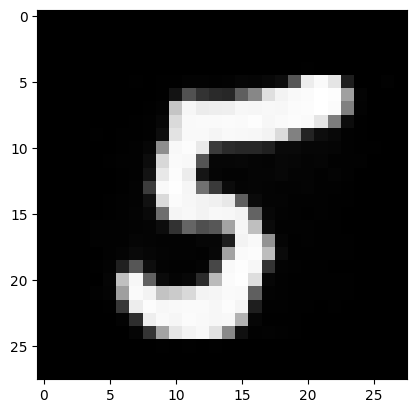

Train Epoch: [83/100], Loss: 0.0051
Train Epoch: [83/100], Loss: 0.0048
Train Epoch: [83/100], Loss: 0.0042
Train Epoch: [83/100], Loss: 0.0044
Train Epoch: [83/100], Loss: 0.0045
Train Epoch: [83/100], Loss: 0.0044
Train Epoch: [83/100], Loss: 0.0044
Train Epoch: [83/100], Loss: 0.0044
Train Epoch: [83/100], Loss: 0.0042
Train Epoch: [83/100], Loss: 0.0043
Train Epoch: [83/100], Loss: 0.0042
Train Epoch: [83/100], Loss: 0.0043
Train Epoch: [83/100], Loss: 0.0041
Train Epoch: [83/100], Loss: 0.0043
Train Epoch: [83/100], Loss: 0.0044
Train Epoch: [83/100], Loss: 0.0042
Train Epoch: [83/100], Loss: 0.0041
Train Epoch: [83/100], Loss: 0.0043
Train Epoch: [83/100], Loss: 0.0042
Train Epoch: [83/100], Loss: 0.0042
Train Epoch: [83/100], Loss: 0.0040
Train Epoch: [83/100], Loss: 0.0043
Train Epoch: [83/100], Loss: 0.0042
Train Epoch: [83/100], Loss: 0.0040
Train Epoch: [83/100], Loss: 0.0041
Train Epoch: [83/100], Loss: 0.0042
Train Epoch: [83/100], Loss: 0.0042
Train Epoch: [83/100], Loss:

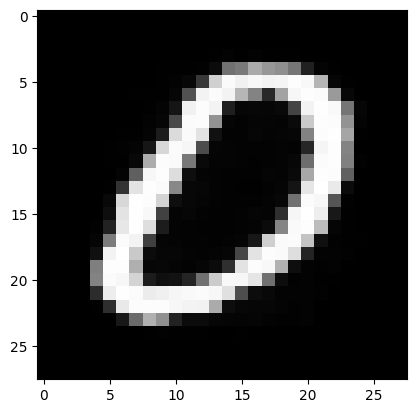

Train Epoch: [84/100], Loss: 0.0040
Train Epoch: [84/100], Loss: 0.0042
Train Epoch: [84/100], Loss: 0.0041
Train Epoch: [84/100], Loss: 0.0038
Train Epoch: [84/100], Loss: 0.0041
Train Epoch: [84/100], Loss: 0.0042
Train Epoch: [84/100], Loss: 0.0041
Train Epoch: [84/100], Loss: 0.0042
Train Epoch: [84/100], Loss: 0.0042
Train Epoch: [84/100], Loss: 0.0043
Train Epoch: [84/100], Loss: 0.0044
Train Epoch: [84/100], Loss: 0.0044
Train Epoch: [84/100], Loss: 0.0043
Train Epoch: [84/100], Loss: 0.0042
Train Epoch: [84/100], Loss: 0.0045
Train Epoch: [84/100], Loss: 0.0043
Train Epoch: [84/100], Loss: 0.0046
Train Epoch: [84/100], Loss: 0.0047
Train Epoch: [84/100], Loss: 0.0047
Train Epoch: [84/100], Loss: 0.0047
Train Epoch: [84/100], Loss: 0.0047
Train Epoch: [84/100], Loss: 0.0045
Train Epoch: [84/100], Loss: 0.0043
Train Epoch: [84/100], Loss: 0.0041
Train Epoch: [84/100], Loss: 0.0044
Train Epoch: [84/100], Loss: 0.0042
Train Epoch: [84/100], Loss: 0.0041
Train Epoch: [84/100], Loss:

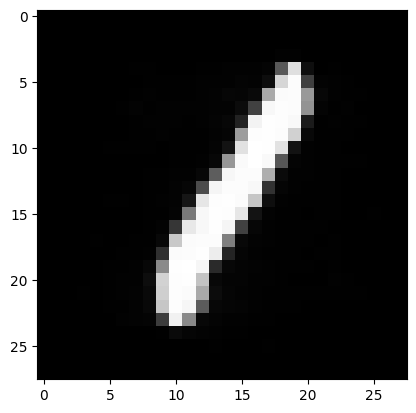

Train Epoch: [85/100], Loss: 0.0041
Train Epoch: [85/100], Loss: 0.0041
Train Epoch: [85/100], Loss: 0.0041
Train Epoch: [85/100], Loss: 0.0041
Train Epoch: [85/100], Loss: 0.0042
Train Epoch: [85/100], Loss: 0.0041
Train Epoch: [85/100], Loss: 0.0042
Train Epoch: [85/100], Loss: 0.0041
Train Epoch: [85/100], Loss: 0.0039
Train Epoch: [85/100], Loss: 0.0041
Train Epoch: [85/100], Loss: 0.0042
Train Epoch: [85/100], Loss: 0.0040
Train Epoch: [85/100], Loss: 0.0042
Train Epoch: [85/100], Loss: 0.0044
Train Epoch: [85/100], Loss: 0.0042
Train Epoch: [85/100], Loss: 0.0044
Train Epoch: [85/100], Loss: 0.0041
Train Epoch: [85/100], Loss: 0.0041
Train Epoch: [85/100], Loss: 0.0041
Train Epoch: [85/100], Loss: 0.0041
Train Epoch: [85/100], Loss: 0.0042
Train Epoch: [85/100], Loss: 0.0041
Train Epoch: [85/100], Loss: 0.0042
Train Epoch: [85/100], Loss: 0.0041
Train Epoch: [85/100], Loss: 0.0040
Train Epoch: [85/100], Loss: 0.0041
Train Epoch: [85/100], Loss: 0.0040
Train Epoch: [85/100], Loss:

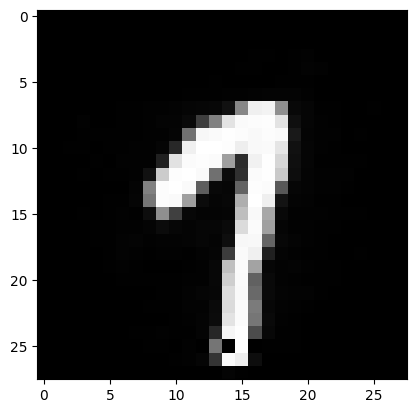

Train Epoch: [86/100], Loss: 0.0041
Train Epoch: [86/100], Loss: 0.0042
Train Epoch: [86/100], Loss: 0.0041
Train Epoch: [86/100], Loss: 0.0041
Train Epoch: [86/100], Loss: 0.0039
Train Epoch: [86/100], Loss: 0.0042
Train Epoch: [86/100], Loss: 0.0042
Train Epoch: [86/100], Loss: 0.0042
Train Epoch: [86/100], Loss: 0.0041
Train Epoch: [86/100], Loss: 0.0044
Train Epoch: [86/100], Loss: 0.0042
Train Epoch: [86/100], Loss: 0.0044
Train Epoch: [86/100], Loss: 0.0047
Train Epoch: [86/100], Loss: 0.0049
Train Epoch: [86/100], Loss: 0.0050
Train Epoch: [86/100], Loss: 0.0055
Train Epoch: [86/100], Loss: 0.0054
Train Epoch: [86/100], Loss: 0.0055
Train Epoch: [86/100], Loss: 0.0048
Train Epoch: [86/100], Loss: 0.0045
Train Epoch: [86/100], Loss: 0.0047
Train Epoch: [86/100], Loss: 0.0046
Train Epoch: [86/100], Loss: 0.0042
Train Epoch: [86/100], Loss: 0.0044
Train Epoch: [86/100], Loss: 0.0044
Train Epoch: [86/100], Loss: 0.0041
Train Epoch: [86/100], Loss: 0.0042
Train Epoch: [86/100], Loss:

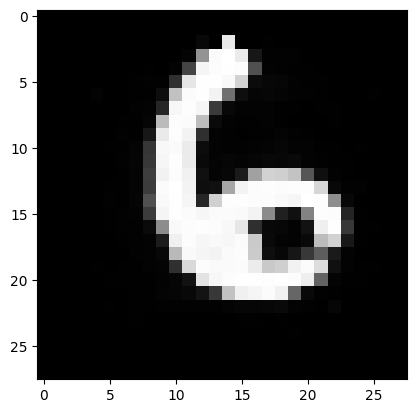

Train Epoch: [87/100], Loss: 0.0042
Train Epoch: [87/100], Loss: 0.0042
Train Epoch: [87/100], Loss: 0.0040
Train Epoch: [87/100], Loss: 0.0041
Train Epoch: [87/100], Loss: 0.0043
Train Epoch: [87/100], Loss: 0.0041
Train Epoch: [87/100], Loss: 0.0042
Train Epoch: [87/100], Loss: 0.0040
Train Epoch: [87/100], Loss: 0.0042
Train Epoch: [87/100], Loss: 0.0040
Train Epoch: [87/100], Loss: 0.0039
Train Epoch: [87/100], Loss: 0.0042
Train Epoch: [87/100], Loss: 0.0042
Train Epoch: [87/100], Loss: 0.0041
Train Epoch: [87/100], Loss: 0.0042
Train Epoch: [87/100], Loss: 0.0042
Train Epoch: [87/100], Loss: 0.0042
Train Epoch: [87/100], Loss: 0.0041
Train Epoch: [87/100], Loss: 0.0041
Train Epoch: [87/100], Loss: 0.0042
Train Epoch: [87/100], Loss: 0.0042
Train Epoch: [87/100], Loss: 0.0041
Train Epoch: [87/100], Loss: 0.0043
Train Epoch: [87/100], Loss: 0.0043
Train Epoch: [87/100], Loss: 0.0044
Train Epoch: [87/100], Loss: 0.0046
Train Epoch: [87/100], Loss: 0.0045
Train Epoch: [87/100], Loss:

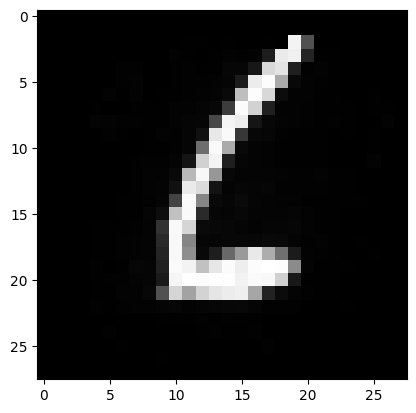

Train Epoch: [88/100], Loss: 0.0039
Train Epoch: [88/100], Loss: 0.0040
Train Epoch: [88/100], Loss: 0.0041
Train Epoch: [88/100], Loss: 0.0041
Train Epoch: [88/100], Loss: 0.0040
Train Epoch: [88/100], Loss: 0.0040
Train Epoch: [88/100], Loss: 0.0041
Train Epoch: [88/100], Loss: 0.0042
Train Epoch: [88/100], Loss: 0.0041
Train Epoch: [88/100], Loss: 0.0042
Train Epoch: [88/100], Loss: 0.0043
Train Epoch: [88/100], Loss: 0.0042
Train Epoch: [88/100], Loss: 0.0042
Train Epoch: [88/100], Loss: 0.0043
Train Epoch: [88/100], Loss: 0.0043
Train Epoch: [88/100], Loss: 0.0041
Train Epoch: [88/100], Loss: 0.0041
Train Epoch: [88/100], Loss: 0.0041
Train Epoch: [88/100], Loss: 0.0043
Train Epoch: [88/100], Loss: 0.0043
Train Epoch: [88/100], Loss: 0.0042
Train Epoch: [88/100], Loss: 0.0042
Train Epoch: [88/100], Loss: 0.0042
Train Epoch: [88/100], Loss: 0.0042
Train Epoch: [88/100], Loss: 0.0040
Train Epoch: [88/100], Loss: 0.0044
Train Epoch: [88/100], Loss: 0.0043
Train Epoch: [88/100], Loss:

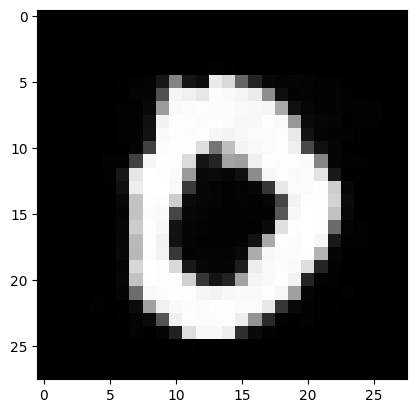

Train Epoch: [89/100], Loss: 0.0042
Train Epoch: [89/100], Loss: 0.0040
Train Epoch: [89/100], Loss: 0.0042
Train Epoch: [89/100], Loss: 0.0040
Train Epoch: [89/100], Loss: 0.0042
Train Epoch: [89/100], Loss: 0.0041
Train Epoch: [89/100], Loss: 0.0039
Train Epoch: [89/100], Loss: 0.0041
Train Epoch: [89/100], Loss: 0.0040
Train Epoch: [89/100], Loss: 0.0041
Train Epoch: [89/100], Loss: 0.0042
Train Epoch: [89/100], Loss: 0.0042
Train Epoch: [89/100], Loss: 0.0043
Train Epoch: [89/100], Loss: 0.0044
Train Epoch: [89/100], Loss: 0.0045
Train Epoch: [89/100], Loss: 0.0043
Train Epoch: [89/100], Loss: 0.0042
Train Epoch: [89/100], Loss: 0.0042
Train Epoch: [89/100], Loss: 0.0041
Train Epoch: [89/100], Loss: 0.0043
Train Epoch: [89/100], Loss: 0.0041
Train Epoch: [89/100], Loss: 0.0042
Train Epoch: [89/100], Loss: 0.0042
Train Epoch: [89/100], Loss: 0.0042
Train Epoch: [89/100], Loss: 0.0042
Train Epoch: [89/100], Loss: 0.0040
Train Epoch: [89/100], Loss: 0.0042
Train Epoch: [89/100], Loss:

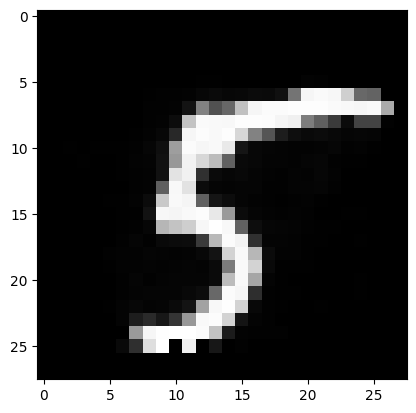

Train Epoch: [90/100], Loss: 0.0048
Train Epoch: [90/100], Loss: 0.0047
Train Epoch: [90/100], Loss: 0.0046
Train Epoch: [90/100], Loss: 0.0047
Train Epoch: [90/100], Loss: 0.0045
Train Epoch: [90/100], Loss: 0.0043
Train Epoch: [90/100], Loss: 0.0044
Train Epoch: [90/100], Loss: 0.0043
Train Epoch: [90/100], Loss: 0.0043
Train Epoch: [90/100], Loss: 0.0042
Train Epoch: [90/100], Loss: 0.0044
Train Epoch: [90/100], Loss: 0.0042
Train Epoch: [90/100], Loss: 0.0043
Train Epoch: [90/100], Loss: 0.0044
Train Epoch: [90/100], Loss: 0.0043
Train Epoch: [90/100], Loss: 0.0041
Train Epoch: [90/100], Loss: 0.0042
Train Epoch: [90/100], Loss: 0.0041
Train Epoch: [90/100], Loss: 0.0041
Train Epoch: [90/100], Loss: 0.0043
Train Epoch: [90/100], Loss: 0.0041
Train Epoch: [90/100], Loss: 0.0040
Train Epoch: [90/100], Loss: 0.0041
Train Epoch: [90/100], Loss: 0.0041
Train Epoch: [90/100], Loss: 0.0041
Train Epoch: [90/100], Loss: 0.0042
Train Epoch: [90/100], Loss: 0.0043
Train Epoch: [90/100], Loss:

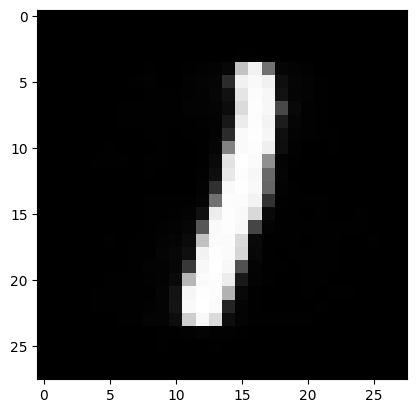

Train Epoch: [91/100], Loss: 0.0040
Train Epoch: [91/100], Loss: 0.0040
Train Epoch: [91/100], Loss: 0.0041
Train Epoch: [91/100], Loss: 0.0041
Train Epoch: [91/100], Loss: 0.0040
Train Epoch: [91/100], Loss: 0.0039
Train Epoch: [91/100], Loss: 0.0039
Train Epoch: [91/100], Loss: 0.0039
Train Epoch: [91/100], Loss: 0.0041
Train Epoch: [91/100], Loss: 0.0040
Train Epoch: [91/100], Loss: 0.0041
Train Epoch: [91/100], Loss: 0.0039
Train Epoch: [91/100], Loss: 0.0039
Train Epoch: [91/100], Loss: 0.0042
Train Epoch: [91/100], Loss: 0.0042
Train Epoch: [91/100], Loss: 0.0042
Train Epoch: [91/100], Loss: 0.0041
Train Epoch: [91/100], Loss: 0.0040
Train Epoch: [91/100], Loss: 0.0042
Train Epoch: [91/100], Loss: 0.0043
Train Epoch: [91/100], Loss: 0.0042
Train Epoch: [91/100], Loss: 0.0041
Train Epoch: [91/100], Loss: 0.0042
Train Epoch: [91/100], Loss: 0.0043
Train Epoch: [91/100], Loss: 0.0042
Train Epoch: [91/100], Loss: 0.0041
Train Epoch: [91/100], Loss: 0.0042
Train Epoch: [91/100], Loss:

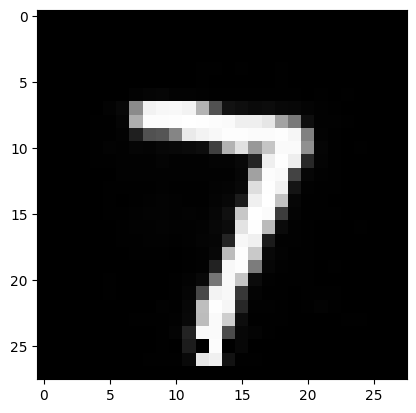

Train Epoch: [92/100], Loss: 0.0044
Train Epoch: [92/100], Loss: 0.0046
Train Epoch: [92/100], Loss: 0.0043
Train Epoch: [92/100], Loss: 0.0041
Train Epoch: [92/100], Loss: 0.0043
Train Epoch: [92/100], Loss: 0.0044
Train Epoch: [92/100], Loss: 0.0043
Train Epoch: [92/100], Loss: 0.0044
Train Epoch: [92/100], Loss: 0.0045
Train Epoch: [92/100], Loss: 0.0043
Train Epoch: [92/100], Loss: 0.0043
Train Epoch: [92/100], Loss: 0.0041
Train Epoch: [92/100], Loss: 0.0044
Train Epoch: [92/100], Loss: 0.0045
Train Epoch: [92/100], Loss: 0.0043
Train Epoch: [92/100], Loss: 0.0040
Train Epoch: [92/100], Loss: 0.0042
Train Epoch: [92/100], Loss: 0.0043
Train Epoch: [92/100], Loss: 0.0044
Train Epoch: [92/100], Loss: 0.0040
Train Epoch: [92/100], Loss: 0.0042
Train Epoch: [92/100], Loss: 0.0042
Train Epoch: [92/100], Loss: 0.0040
Train Epoch: [92/100], Loss: 0.0039
Train Epoch: [92/100], Loss: 0.0039
Train Epoch: [92/100], Loss: 0.0042
Train Epoch: [92/100], Loss: 0.0040
Train Epoch: [92/100], Loss:

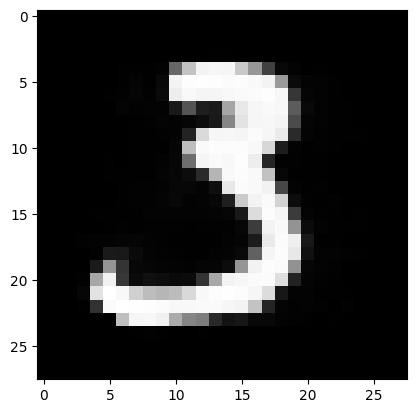

Train Epoch: [93/100], Loss: 0.0041
Train Epoch: [93/100], Loss: 0.0041
Train Epoch: [93/100], Loss: 0.0042
Train Epoch: [93/100], Loss: 0.0040
Train Epoch: [93/100], Loss: 0.0041
Train Epoch: [93/100], Loss: 0.0040
Train Epoch: [93/100], Loss: 0.0040
Train Epoch: [93/100], Loss: 0.0039
Train Epoch: [93/100], Loss: 0.0037
Train Epoch: [93/100], Loss: 0.0042
Train Epoch: [93/100], Loss: 0.0039
Train Epoch: [93/100], Loss: 0.0040
Train Epoch: [93/100], Loss: 0.0041
Train Epoch: [93/100], Loss: 0.0041
Train Epoch: [93/100], Loss: 0.0041
Train Epoch: [93/100], Loss: 0.0040
Train Epoch: [93/100], Loss: 0.0042
Train Epoch: [93/100], Loss: 0.0043
Train Epoch: [93/100], Loss: 0.0042
Train Epoch: [93/100], Loss: 0.0041
Train Epoch: [93/100], Loss: 0.0041
Train Epoch: [93/100], Loss: 0.0043
Train Epoch: [93/100], Loss: 0.0044
Train Epoch: [93/100], Loss: 0.0045
Train Epoch: [93/100], Loss: 0.0044
Train Epoch: [93/100], Loss: 0.0045
Train Epoch: [93/100], Loss: 0.0043
Train Epoch: [93/100], Loss:

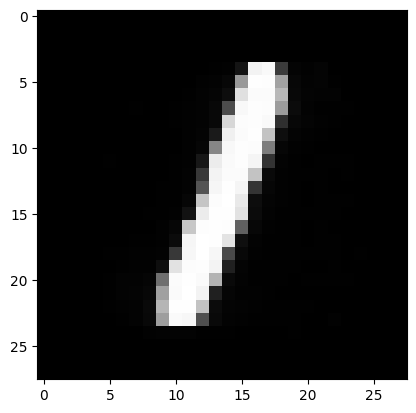

Train Epoch: [94/100], Loss: 0.0042
Train Epoch: [94/100], Loss: 0.0041
Train Epoch: [94/100], Loss: 0.0042
Train Epoch: [94/100], Loss: 0.0041
Train Epoch: [94/100], Loss: 0.0040
Train Epoch: [94/100], Loss: 0.0040
Train Epoch: [94/100], Loss: 0.0041
Train Epoch: [94/100], Loss: 0.0040
Train Epoch: [94/100], Loss: 0.0043
Train Epoch: [94/100], Loss: 0.0040
Train Epoch: [94/100], Loss: 0.0042
Train Epoch: [94/100], Loss: 0.0044
Train Epoch: [94/100], Loss: 0.0042
Train Epoch: [94/100], Loss: 0.0044
Train Epoch: [94/100], Loss: 0.0041
Train Epoch: [94/100], Loss: 0.0042
Train Epoch: [94/100], Loss: 0.0040
Train Epoch: [94/100], Loss: 0.0043
Train Epoch: [94/100], Loss: 0.0042
Train Epoch: [94/100], Loss: 0.0042
Train Epoch: [94/100], Loss: 0.0042
Train Epoch: [94/100], Loss: 0.0042
Train Epoch: [94/100], Loss: 0.0041
Train Epoch: [94/100], Loss: 0.0041
Train Epoch: [94/100], Loss: 0.0039
Train Epoch: [94/100], Loss: 0.0040
Train Epoch: [94/100], Loss: 0.0043
Train Epoch: [94/100], Loss:

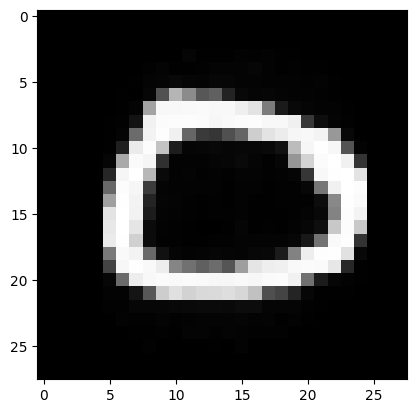

Train Epoch: [95/100], Loss: 0.0040
Train Epoch: [95/100], Loss: 0.0041
Train Epoch: [95/100], Loss: 0.0039
Train Epoch: [95/100], Loss: 0.0041
Train Epoch: [95/100], Loss: 0.0041
Train Epoch: [95/100], Loss: 0.0042
Train Epoch: [95/100], Loss: 0.0039
Train Epoch: [95/100], Loss: 0.0040
Train Epoch: [95/100], Loss: 0.0039
Train Epoch: [95/100], Loss: 0.0040
Train Epoch: [95/100], Loss: 0.0039
Train Epoch: [95/100], Loss: 0.0040
Train Epoch: [95/100], Loss: 0.0040
Train Epoch: [95/100], Loss: 0.0041
Train Epoch: [95/100], Loss: 0.0043
Train Epoch: [95/100], Loss: 0.0044
Train Epoch: [95/100], Loss: 0.0043
Train Epoch: [95/100], Loss: 0.0046
Train Epoch: [95/100], Loss: 0.0045
Train Epoch: [95/100], Loss: 0.0046
Train Epoch: [95/100], Loss: 0.0045
Train Epoch: [95/100], Loss: 0.0046
Train Epoch: [95/100], Loss: 0.0044
Train Epoch: [95/100], Loss: 0.0045
Train Epoch: [95/100], Loss: 0.0043
Train Epoch: [95/100], Loss: 0.0043
Train Epoch: [95/100], Loss: 0.0040
Train Epoch: [95/100], Loss:

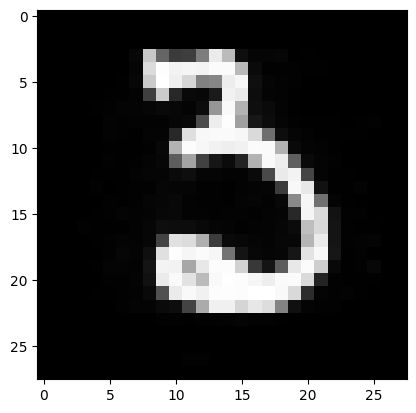

Train Epoch: [96/100], Loss: 0.0039
Train Epoch: [96/100], Loss: 0.0039
Train Epoch: [96/100], Loss: 0.0040
Train Epoch: [96/100], Loss: 0.0042
Train Epoch: [96/100], Loss: 0.0043
Train Epoch: [96/100], Loss: 0.0041
Train Epoch: [96/100], Loss: 0.0041
Train Epoch: [96/100], Loss: 0.0042
Train Epoch: [96/100], Loss: 0.0043
Train Epoch: [96/100], Loss: 0.0042
Train Epoch: [96/100], Loss: 0.0042
Train Epoch: [96/100], Loss: 0.0039
Train Epoch: [96/100], Loss: 0.0039
Train Epoch: [96/100], Loss: 0.0039
Train Epoch: [96/100], Loss: 0.0040
Train Epoch: [96/100], Loss: 0.0040
Train Epoch: [96/100], Loss: 0.0040
Train Epoch: [96/100], Loss: 0.0040
Train Epoch: [96/100], Loss: 0.0043
Train Epoch: [96/100], Loss: 0.0041
Train Epoch: [96/100], Loss: 0.0042
Train Epoch: [96/100], Loss: 0.0040
Train Epoch: [96/100], Loss: 0.0041
Train Epoch: [96/100], Loss: 0.0042
Train Epoch: [96/100], Loss: 0.0040
Train Epoch: [96/100], Loss: 0.0043
Train Epoch: [96/100], Loss: 0.0042
Train Epoch: [96/100], Loss:

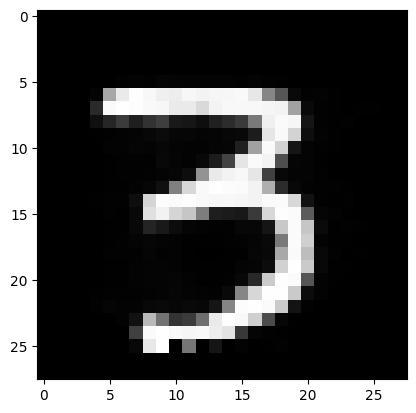

Train Epoch: [97/100], Loss: 0.0040
Train Epoch: [97/100], Loss: 0.0041
Train Epoch: [97/100], Loss: 0.0043
Train Epoch: [97/100], Loss: 0.0042
Train Epoch: [97/100], Loss: 0.0041
Train Epoch: [97/100], Loss: 0.0045
Train Epoch: [97/100], Loss: 0.0041
Train Epoch: [97/100], Loss: 0.0041
Train Epoch: [97/100], Loss: 0.0040
Train Epoch: [97/100], Loss: 0.0042
Train Epoch: [97/100], Loss: 0.0041
Train Epoch: [97/100], Loss: 0.0041
Train Epoch: [97/100], Loss: 0.0042
Train Epoch: [97/100], Loss: 0.0042
Train Epoch: [97/100], Loss: 0.0042
Train Epoch: [97/100], Loss: 0.0043
Train Epoch: [97/100], Loss: 0.0041
Train Epoch: [97/100], Loss: 0.0042
Train Epoch: [97/100], Loss: 0.0042
Train Epoch: [97/100], Loss: 0.0042
Train Epoch: [97/100], Loss: 0.0042
Train Epoch: [97/100], Loss: 0.0042
Train Epoch: [97/100], Loss: 0.0040
Train Epoch: [97/100], Loss: 0.0040
Train Epoch: [97/100], Loss: 0.0041
Train Epoch: [97/100], Loss: 0.0042
Train Epoch: [97/100], Loss: 0.0042
Train Epoch: [97/100], Loss:

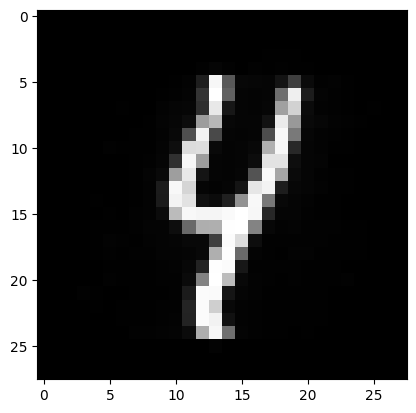

Train Epoch: [98/100], Loss: 0.0039
Train Epoch: [98/100], Loss: 0.0040
Train Epoch: [98/100], Loss: 0.0040
Train Epoch: [98/100], Loss: 0.0040
Train Epoch: [98/100], Loss: 0.0044
Train Epoch: [98/100], Loss: 0.0044
Train Epoch: [98/100], Loss: 0.0046
Train Epoch: [98/100], Loss: 0.0053
Train Epoch: [98/100], Loss: 0.0056
Train Epoch: [98/100], Loss: 0.0061
Train Epoch: [98/100], Loss: 0.0055
Train Epoch: [98/100], Loss: 0.0052
Train Epoch: [98/100], Loss: 0.0048
Train Epoch: [98/100], Loss: 0.0048
Train Epoch: [98/100], Loss: 0.0046
Train Epoch: [98/100], Loss: 0.0045
Train Epoch: [98/100], Loss: 0.0045
Train Epoch: [98/100], Loss: 0.0045
Train Epoch: [98/100], Loss: 0.0043
Train Epoch: [98/100], Loss: 0.0044
Train Epoch: [98/100], Loss: 0.0044
Train Epoch: [98/100], Loss: 0.0045
Train Epoch: [98/100], Loss: 0.0042
Train Epoch: [98/100], Loss: 0.0044
Train Epoch: [98/100], Loss: 0.0042
Train Epoch: [98/100], Loss: 0.0041
Train Epoch: [98/100], Loss: 0.0040
Train Epoch: [98/100], Loss:

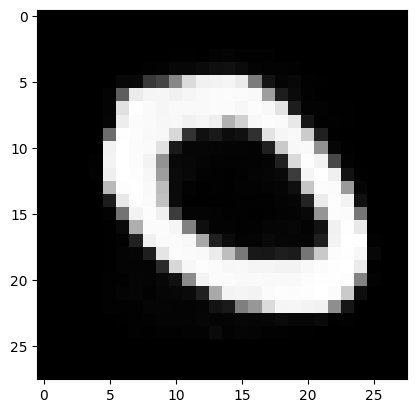

Train Epoch: [99/100], Loss: 0.0038
Train Epoch: [99/100], Loss: 0.0041
Train Epoch: [99/100], Loss: 0.0039
Train Epoch: [99/100], Loss: 0.0040
Train Epoch: [99/100], Loss: 0.0040
Train Epoch: [99/100], Loss: 0.0041
Train Epoch: [99/100], Loss: 0.0041
Train Epoch: [99/100], Loss: 0.0040
Train Epoch: [99/100], Loss: 0.0040
Train Epoch: [99/100], Loss: 0.0042
Train Epoch: [99/100], Loss: 0.0041
Train Epoch: [99/100], Loss: 0.0042
Train Epoch: [99/100], Loss: 0.0040
Train Epoch: [99/100], Loss: 0.0040
Train Epoch: [99/100], Loss: 0.0039
Train Epoch: [99/100], Loss: 0.0041
Train Epoch: [99/100], Loss: 0.0040
Train Epoch: [99/100], Loss: 0.0040
Train Epoch: [99/100], Loss: 0.0042
Train Epoch: [99/100], Loss: 0.0040
Train Epoch: [99/100], Loss: 0.0040
Train Epoch: [99/100], Loss: 0.0041
Train Epoch: [99/100], Loss: 0.0039
Train Epoch: [99/100], Loss: 0.0040
Train Epoch: [99/100], Loss: 0.0040
Train Epoch: [99/100], Loss: 0.0041
Train Epoch: [99/100], Loss: 0.0041
Train Epoch: [99/100], Loss:

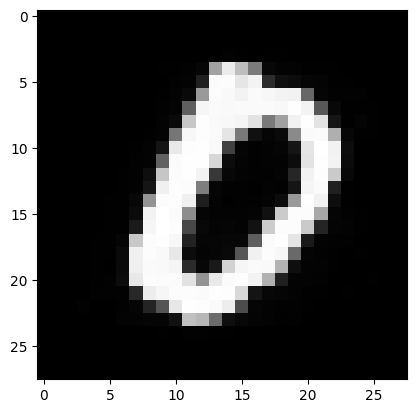

In [7]:
for epoch in range(n_epochs):
    train(epoch)
    